In [8]:
import pandas as pd
import numpy as np

In [9]:
appl=pd.read_csv("app.csv")

In [10]:
appl.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
prev=pd.read_csv("pre.csv")
prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [13]:
prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [14]:
appl.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [15]:
prev.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [16]:
appl.shape

(307511, 122)

In [17]:
prev.shape

(1670214, 37)

In [18]:
#checking the nulls in percentage
n_val=round(appl.isna().sum()/len(appl.index)*100,2)
n_val

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 122, dtype: float64

In [19]:
n_val[n_val>35]

OWN_CAR_AGE                     65.99
EXT_SOURCE_1                    56.38
APARTMENTS_AVG                  50.75
BASEMENTAREA_AVG                58.52
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BUILD_AVG                 66.50
COMMONAREA_AVG                  69.87
ELEVATORS_AVG                   53.30
ENTRANCES_AVG                   50.35
FLOORSMAX_AVG                   49.76
FLOORSMIN_AVG                   67.85
LANDAREA_AVG                    59.38
LIVINGAPARTMENTS_AVG            68.35
LIVINGAREA_AVG                  50.19
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAREA_AVG               55.18
APARTMENTS_MODE                 50.75
BASEMENTAREA_MODE               58.52
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BUILD_MODE                66.50
COMMONAREA_MODE                 69.87
ELEVATORS_MODE                  53.30
ENTRANCES_MODE                  50.35
FLOORSMAX_MODE                  49.76
FLOORSMIN_MODE                  67.85
LANDAREA_MODE                   59.38
LIVINGAPARTM

In [20]:
#dropping the columns that has more than 35% null values
appl.drop(n_val[n_val>35].index,axis=1,inplace=True)

In [21]:
appl.shape

(307511, 73)

In [22]:
appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [23]:
#dropping the null values that are not necessary
non_necessary_columns=['CNT_CHILDREN','REGION_POPULATION_RELATIVE','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','EXT_SOURCE_3','DAYS_LAST_PHONE_CHANGE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']

In [24]:
appl.drop(non_necessary_columns,axis=1,inplace=True)

In [25]:
appl.shape

(307511, 38)

In [26]:
appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   AMT_ANNUITY                  307499 non-null  float64
 9   AMT_GOODS_PRICE              307233 non-null  float64
 10  NAME_TYPE_SUITE              306219 non-null  object 
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

In [27]:
appl.isna().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                96391
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
REG_CITY_NOT_LIVE_CITY             0
REG_CITY_NOT_WORK_CITY             0
LIVE_CITY_NOT_WORK_CITY            0
ORGANIZATION_TYPE                  0
E

In [28]:
d=appl['AMT_ANNUITY']

In [29]:
from matplotlib import pyplot as plt
import seaborn as sns

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


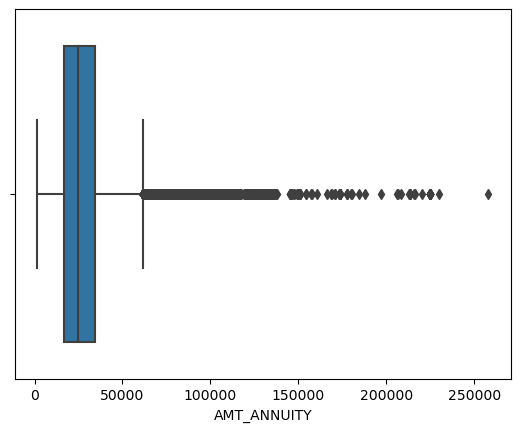

In [30]:
#checking for outliers in AMT_ANNUITY
sns.boxplot(d)
plt.show()

In [31]:
#from the plot there are outliers which is the point after 25oooo,so we are using meadin to fill the null values
appl.fillna({'AMT_ANNUITY':appl['AMT_ANNUITY'].median()},inplace=True)

In [32]:
appl['AMT_ANNUITY'].isna().sum()

0

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


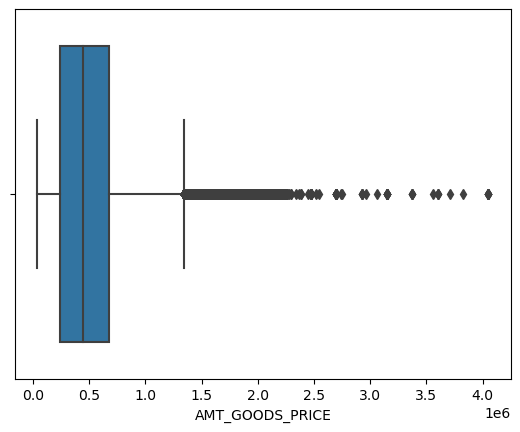

In [33]:
sns.boxplot(appl['AMT_GOODS_PRICE'])
plt.show()

In [34]:
appl.fillna({'AMT_GOODS_PRICE':appl['AMT_GOODS_PRICE'].median()},inplace=True)

In [35]:
appl['AMT_GOODS_PRICE'].isna().sum()

0

In [36]:
#this column is not numerical so we are filling the nulls using mode.
appl.fillna({'NAME_TYPE_SUITE':appl['NAME_TYPE_SUITE'].mode()[0]},inplace=True)

In [37]:
appl['NAME_TYPE_SUITE'].isna().sum()

0

In [38]:
appl.fillna({'OCCUPATION_TYPE':appl['OCCUPATION_TYPE'].mode()[0]},inplace=True)

In [39]:
appl['OCCUPATION_TYPE'].isna().sum()

0

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


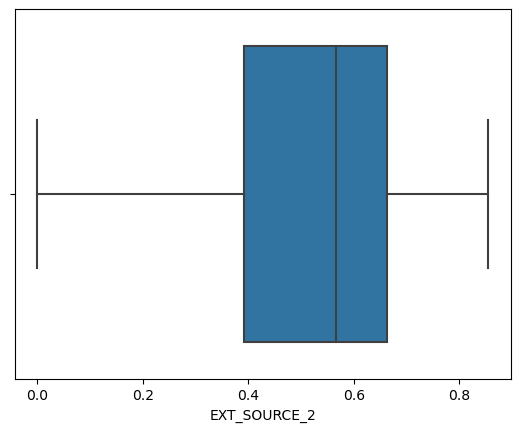

In [40]:
sns.boxplot(appl['EXT_SOURCE_2'])
plt.show()

In [41]:
appl.fillna({'EXT_SOURCE_2':appl['EXT_SOURCE_2'].mean()},inplace=True)

In [42]:
appl['EXT_SOURCE_2'].isna().sum()

0

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


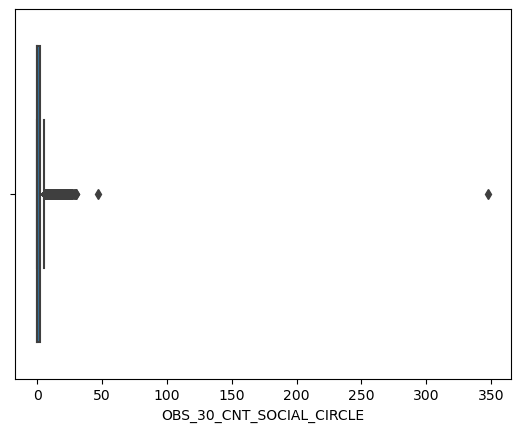

In [43]:
sns.boxplot(appl['OBS_30_CNT_SOCIAL_CIRCLE'])
plt.show()

In [44]:
appl.fillna({'OBS_30_CNT_SOCIAL_CIRCLE':appl['OBS_30_CNT_SOCIAL_CIRCLE'].median()},inplace=True)

In [45]:
appl['OBS_30_CNT_SOCIAL_CIRCLE'].isna().sum()

0

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


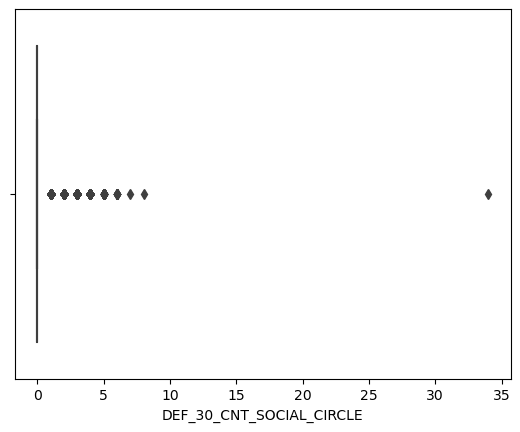

In [46]:
sns.boxplot(appl['DEF_30_CNT_SOCIAL_CIRCLE'])
plt.show()

In [47]:
appl.fillna({'DEF_30_CNT_SOCIAL_CIRCLE':appl['DEF_30_CNT_SOCIAL_CIRCLE'].median()},inplace=True)

In [48]:
appl['DEF_30_CNT_SOCIAL_CIRCLE'].isna().sum()

0

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


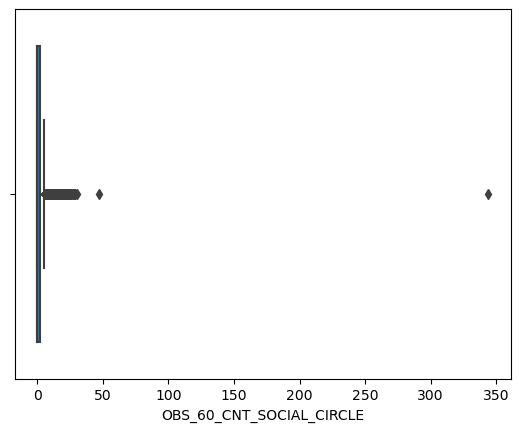

In [49]:
sns.boxplot(appl['OBS_60_CNT_SOCIAL_CIRCLE'])
plt.show()

In [50]:
appl.fillna({'OBS_60_CNT_SOCIAL_CIRCLE':appl['OBS_60_CNT_SOCIAL_CIRCLE'].median()},inplace=True)

In [51]:
appl['OBS_60_CNT_SOCIAL_CIRCLE'].isna().sum()

0

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


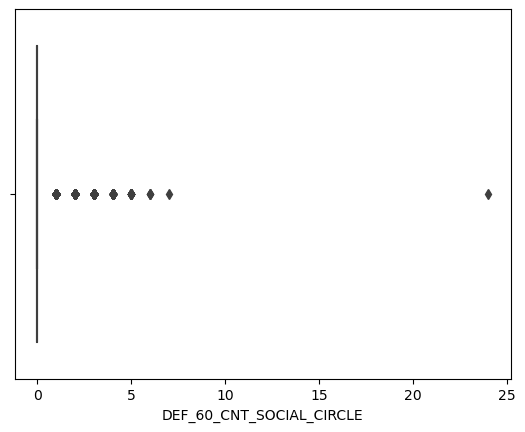

In [52]:
sns.boxplot(appl['DEF_60_CNT_SOCIAL_CIRCLE'])
plt.show()

In [53]:
appl.fillna({'DEF_60_CNT_SOCIAL_CIRCLE':appl['DEF_60_CNT_SOCIAL_CIRCLE'].median()},inplace=True)

In [54]:
appl['DEF_60_CNT_SOCIAL_CIRCLE'].isna().sum()

0

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


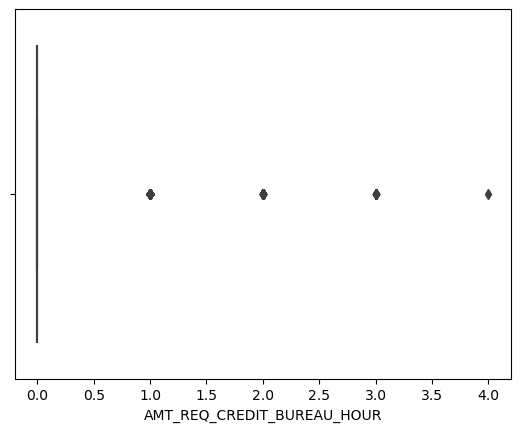

In [55]:
sns.boxplot(appl['AMT_REQ_CREDIT_BUREAU_HOUR'])
plt.show()

In [56]:
appl.fillna({'AMT_REQ_CREDIT_BUREAU_HOUR':appl['AMT_REQ_CREDIT_BUREAU_HOUR'].mean()},inplace=True)

In [57]:
appl['AMT_REQ_CREDIT_BUREAU_HOUR'].isna().sum()

0

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


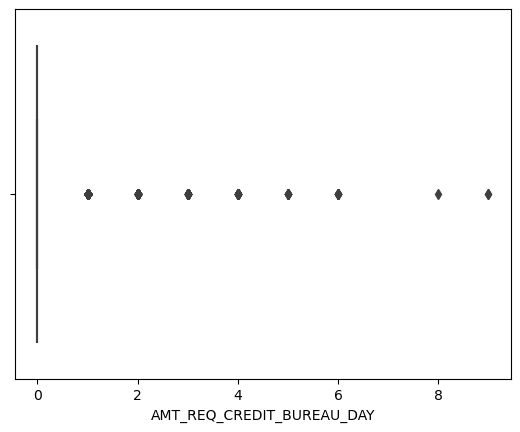

In [58]:
sns.boxplot(appl['AMT_REQ_CREDIT_BUREAU_DAY'])
plt.show()

In [59]:
appl.fillna({'AMT_REQ_CREDIT_BUREAU_DAY':appl['AMT_REQ_CREDIT_BUREAU_DAY'].mean()},inplace=True)

In [60]:
appl['AMT_REQ_CREDIT_BUREAU_DAY'].isna().sum()

0

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


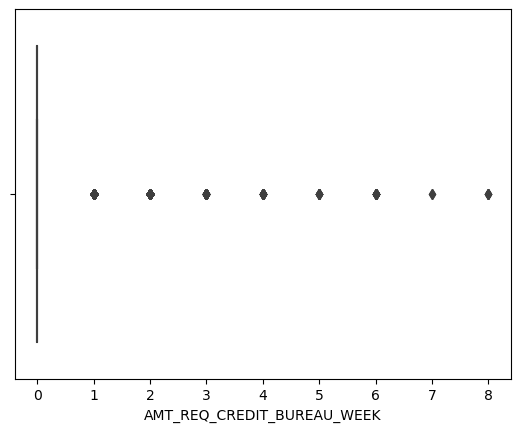

In [61]:
sns.boxplot(appl['AMT_REQ_CREDIT_BUREAU_WEEK'])
plt.show()

In [62]:
appl.fillna({'AMT_REQ_CREDIT_BUREAU_WEEK':appl['AMT_REQ_CREDIT_BUREAU_WEEK'].mean()},inplace=True)

In [63]:
appl['AMT_REQ_CREDIT_BUREAU_WEEK'].isna().sum()

0

In [64]:
appl.fillna({'AMT_REQ_CREDIT_BUREAU_MON':appl['AMT_REQ_CREDIT_BUREAU_MON'].mean()},inplace=True)

In [65]:
appl['AMT_REQ_CREDIT_BUREAU_MON'].isna().sum()

0

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


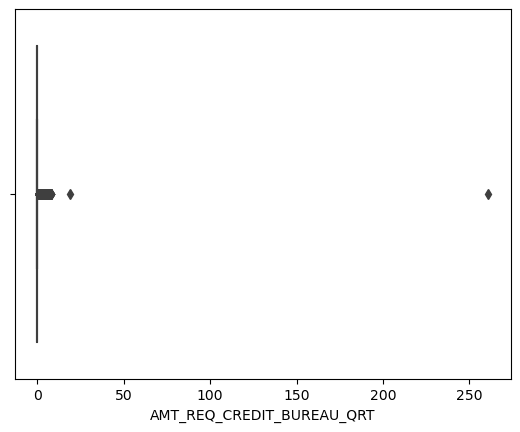

In [66]:
sns.boxplot(appl['AMT_REQ_CREDIT_BUREAU_QRT'])
plt.show()

In [67]:
appl.fillna({'AMT_REQ_CREDIT_BUREAU_QRT':appl['AMT_REQ_CREDIT_BUREAU_QRT'].median()},inplace=True)

In [68]:
appl['AMT_REQ_CREDIT_BUREAU_QRT'].isna().sum()

0

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


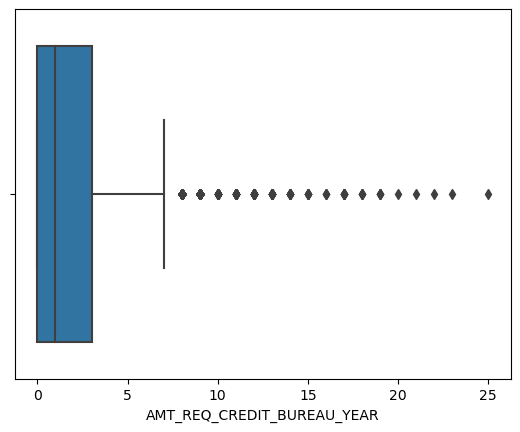

In [69]:
sns.boxplot(appl['AMT_REQ_CREDIT_BUREAU_YEAR'])
plt.show()

In [70]:
appl.fillna({'AMT_REQ_CREDIT_BUREAU_YEAR':appl['AMT_REQ_CREDIT_BUREAU_YEAR'].median()},inplace=True)

In [71]:
appl['AMT_REQ_CREDIT_BUREAU_YEAR'].isna().sum()

0

In [72]:
appl.isna().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
OCCUPATION_TYPE                0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
ORGANIZATION_TYPE              0
EXT_SOURCE_2                   0
OBS_30_CNT_SOCIAL_CIRCLE       0
DEF_30_CNT_SOCIAL_CIRCLE       0
OBS_60_CNT

In [73]:
prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [74]:
prev.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [75]:
nul_val=round(prev.isna().sum()/len(prev.index)*100,2)

In [76]:
nul_val

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [77]:
prev.drop(nul_val[nul_val>35].index,axis=1,inplace=True)

In [78]:
prev.isna().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMBINATION               346
dtype: int64

In [79]:
list=['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START']
prev.drop(list,axis=1,inplace=True)

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


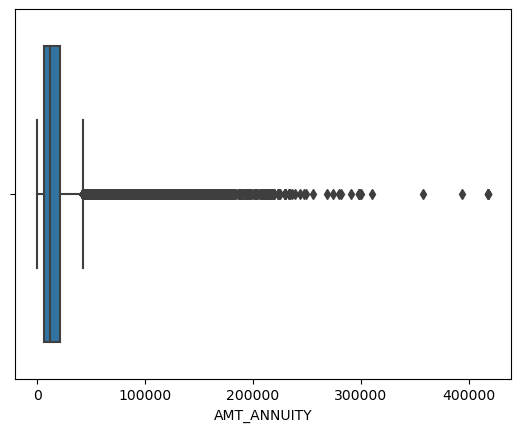

In [80]:
sns.boxplot(prev['AMT_ANNUITY'])
plt.show()

In [81]:
prev.fillna({'AMT_ANNUITY':prev['AMT_ANNUITY'].median()},inplace=True)

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


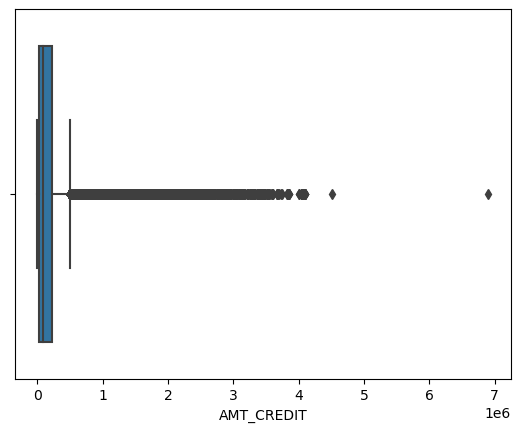

In [82]:
sns.boxplot(prev['AMT_CREDIT'])
plt.show()

In [83]:
prev.fillna({'AMT_CREDIT':prev['AMT_CREDIT'].median()},inplace=True)

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


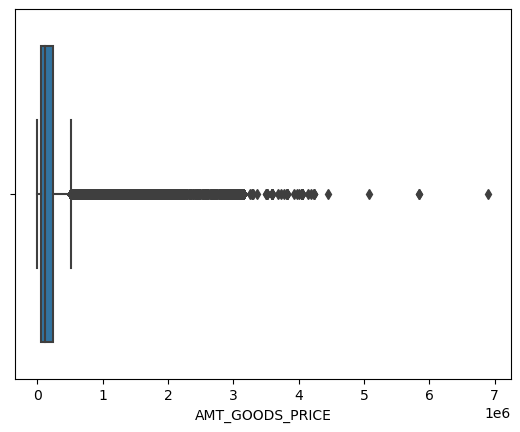

In [84]:
sns.boxplot(prev['AMT_GOODS_PRICE'])
plt.show()

In [85]:
prev.fillna({'AMT_GOODS_PRICE':prev['AMT_GOODS_PRICE'].median()},inplace=True)

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


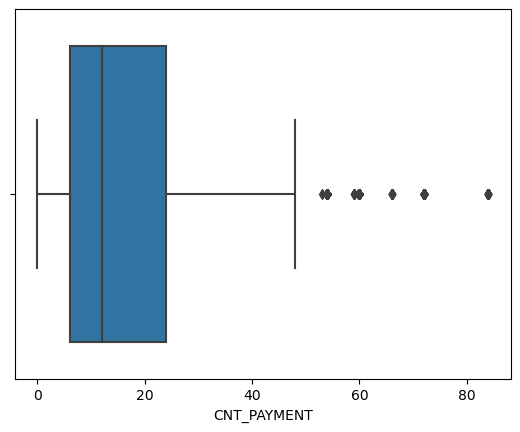

In [86]:
sns.boxplot(prev['CNT_PAYMENT'])
plt.show()

In [87]:
prev.fillna({'CNT_PAYMENT':prev['CNT_PAYMENT'].median()},inplace=True)

In [88]:
prev.fillna({'PRODUCT_COMBINATION':prev['PRODUCT_COMBINATION'].mode()[0]},inplace=True)

In [89]:
prev.isna().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
dtype: int64

In [90]:
prev.shape

(1670214, 24)

In [91]:
#checking outliers

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


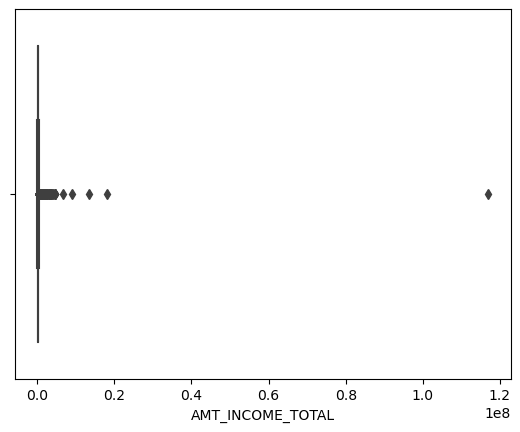

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


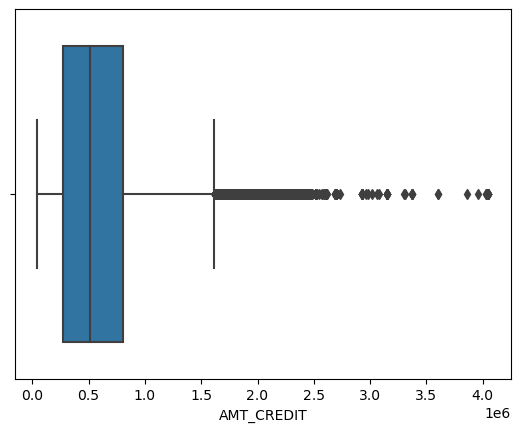

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


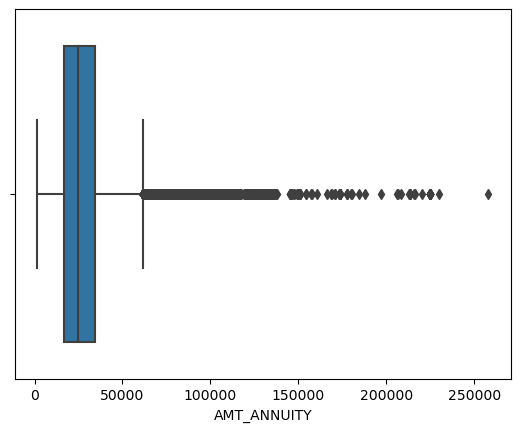

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


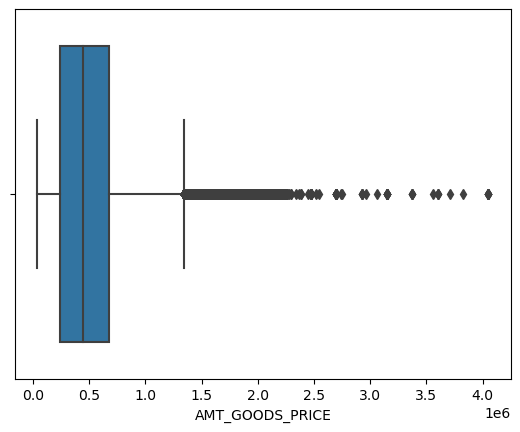

In [92]:
list=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE',]
for i in list:
    sns.boxplot(appl[i])
    plt.show()

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


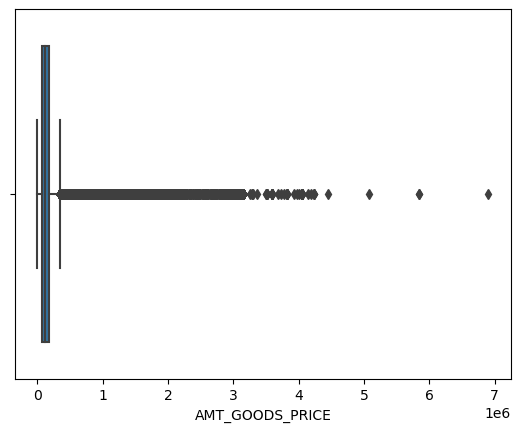

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


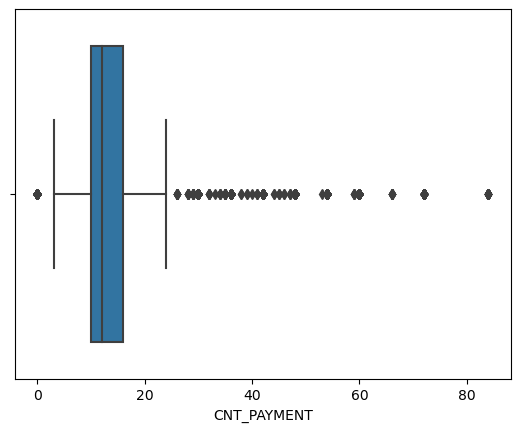

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


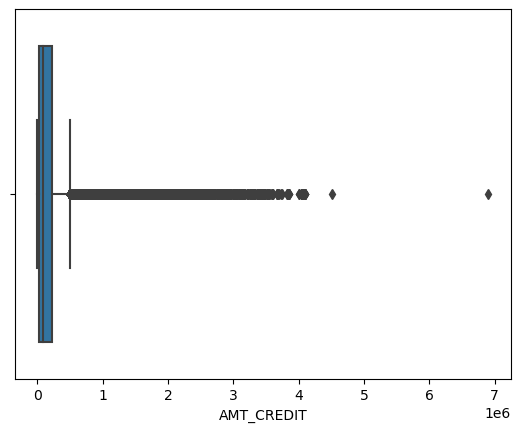

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


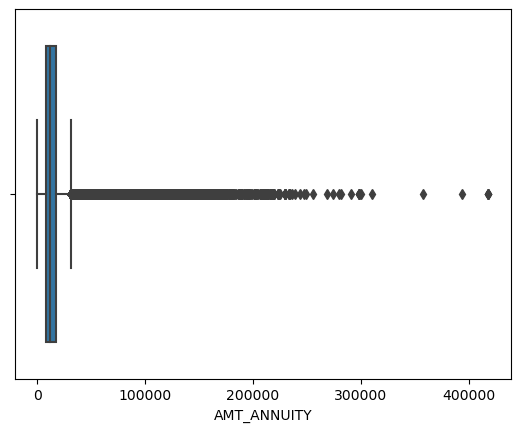

In [93]:
list=['AMT_GOODS_PRICE','CNT_PAYMENT','AMT_CREDIT','AMT_ANNUITY']
for i in list:
    sns.boxplot(prev[i])
    plt.show()

In [94]:
#checking imbalance

In [95]:
appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   AMT_ANNUITY                  307511 non-null  float64
 9   AMT_GOODS_PRICE              307511 non-null  float64
 10  NAME_TYPE_SUITE              307511 non-null  object 
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

In [96]:
appl.nunique()

SK_ID_CURR                     307511
TARGET                              2
NAME_CONTRACT_TYPE                  2
CODE_GENDER                         3
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
AMT_INCOME_TOTAL                 2548
AMT_CREDIT                       5603
AMT_ANNUITY                     13672
AMT_GOODS_PRICE                  1002
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
DAYS_BIRTH                      17460
DAYS_EMPLOYED                   12574
DAYS_REGISTRATION               15688
DAYS_ID_PUBLISH                  6168
OCCUPATION_TYPE                    18
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
ORGANIZATION

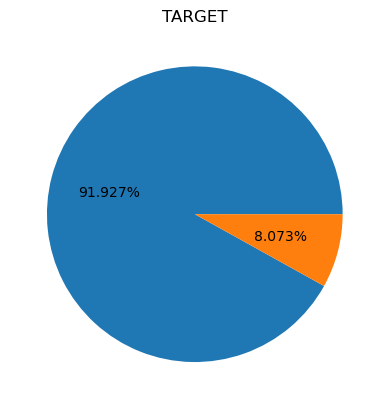

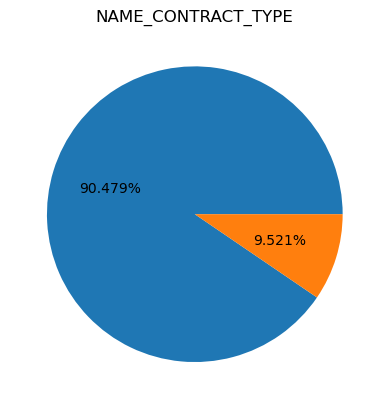

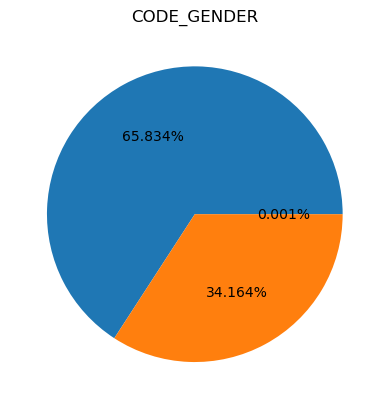

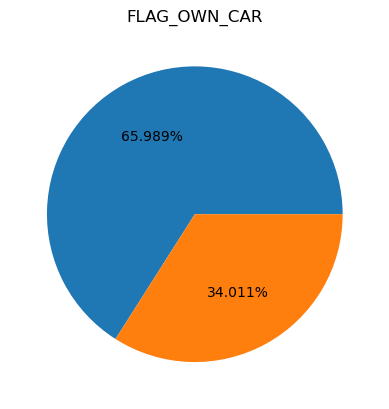

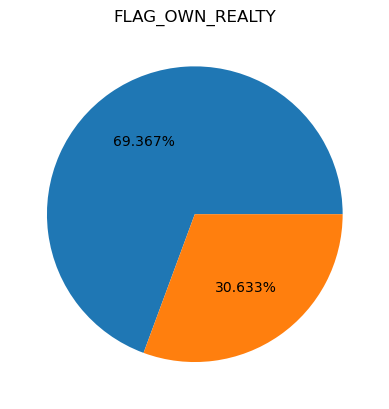

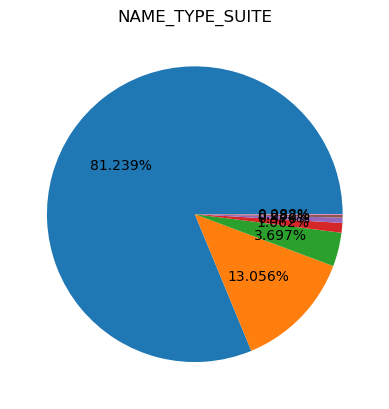

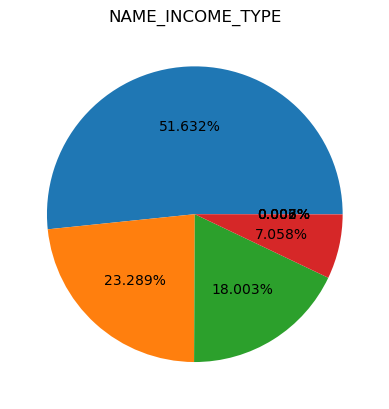

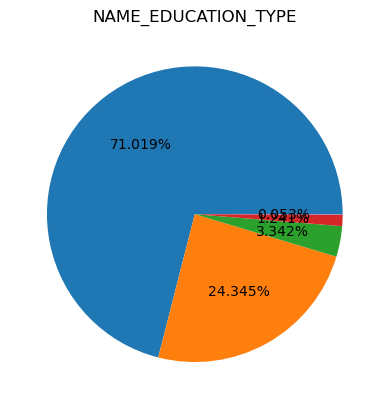

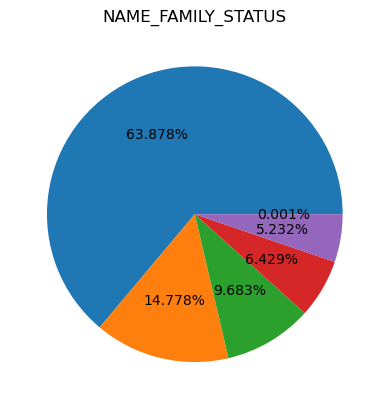

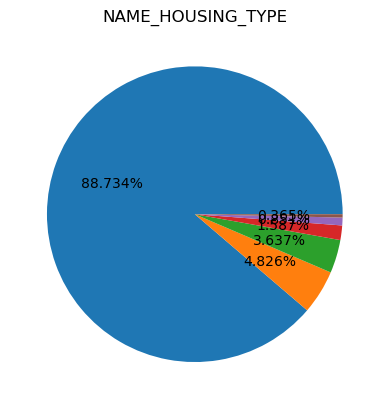

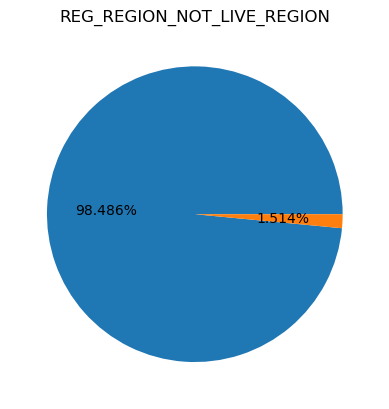

In [104]:
list=['TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','REG_REGION_NOT_LIVE_REGION']
for i in list:
    plt.pie(appl[i].value_counts(normalize=True),autopct='%.3f%%')
    plt.title(i)
    plt.show()

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


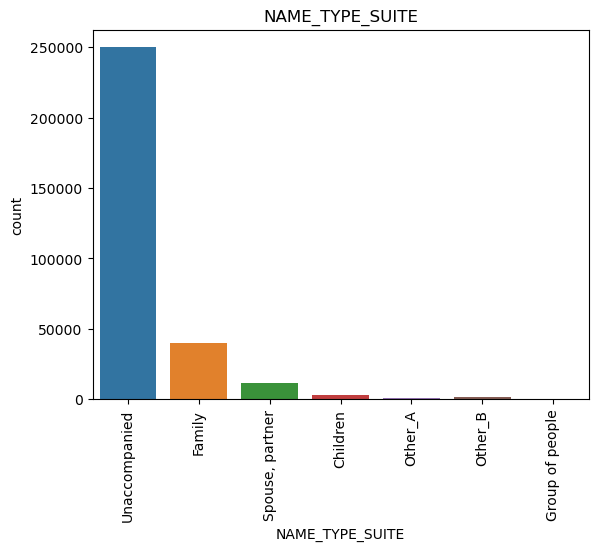

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


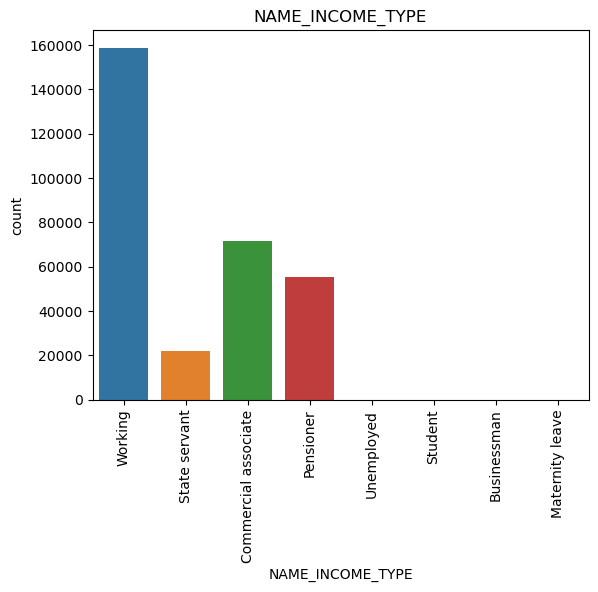

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


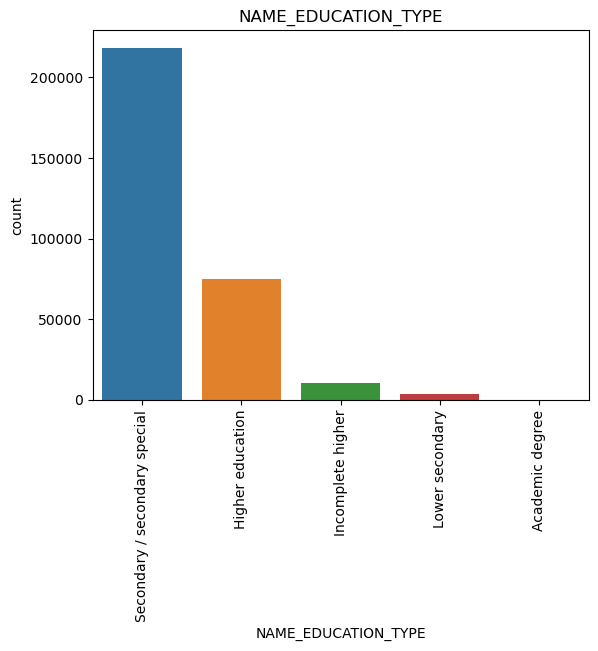

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


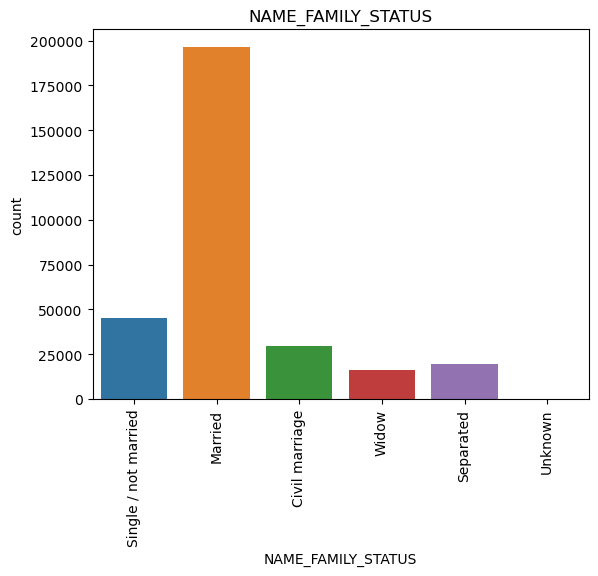

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


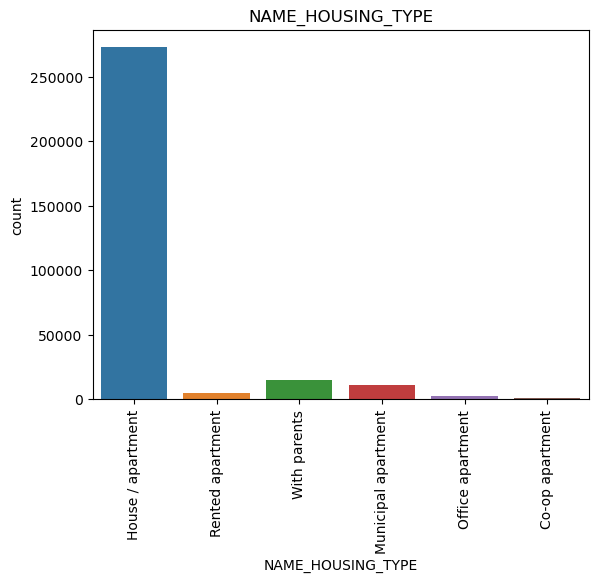

In [98]:
l=['NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']
for i in l:
    sns.countplot(appl[i])
    plt.title(i)
    plt.xticks(rotation=90)
    plt.show()

In [99]:
prev.nunique()

SK_ID_PREV                     1670214
SK_ID_CURR                      338857
NAME_CONTRACT_TYPE                   4
AMT_ANNUITY                     357959
AMT_APPLICATION                  93885
AMT_CREDIT                       86803
AMT_GOODS_PRICE                  93885
FLAG_LAST_APPL_PER_CONTRACT          2
NFLAG_LAST_APPL_IN_DAY               2
NAME_CASH_LOAN_PURPOSE              25
NAME_CONTRACT_STATUS                 4
DAYS_DECISION                     2922
NAME_PAYMENT_TYPE                    4
CODE_REJECT_REASON                   9
NAME_CLIENT_TYPE                     4
NAME_GOODS_CATEGORY                 28
NAME_PORTFOLIO                       5
NAME_PRODUCT_TYPE                    3
CHANNEL_TYPE                         8
SELLERPLACE_AREA                  2097
NAME_SELLER_INDUSTRY                11
CNT_PAYMENT                         49
NAME_YIELD_GROUP                     5
PRODUCT_COMBINATION                 17
dtype: int64

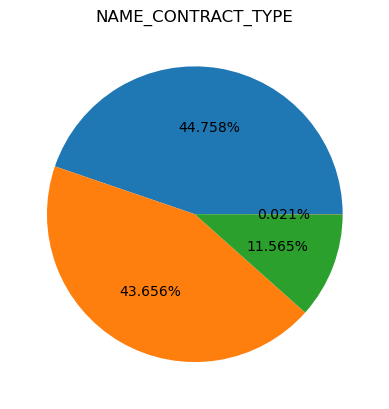

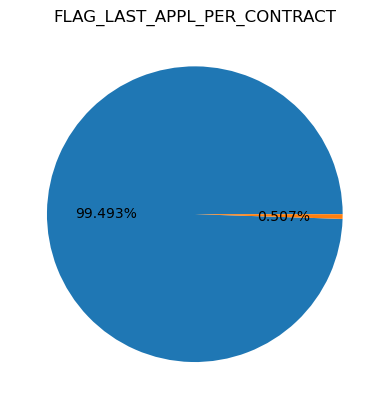

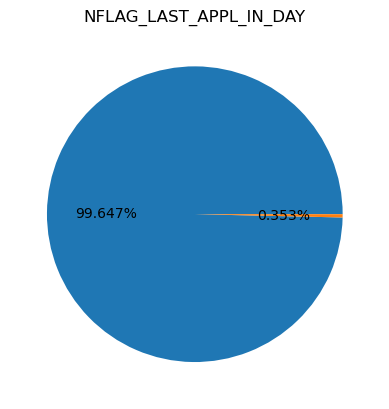

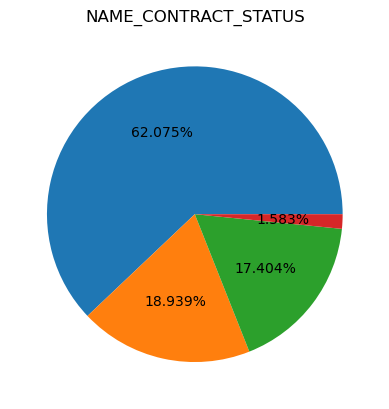

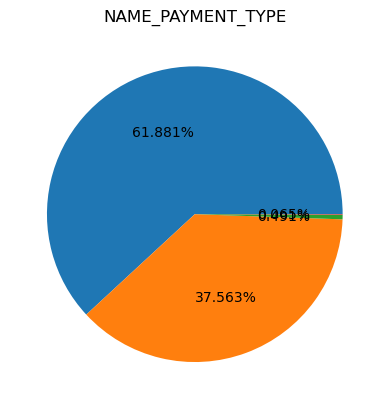

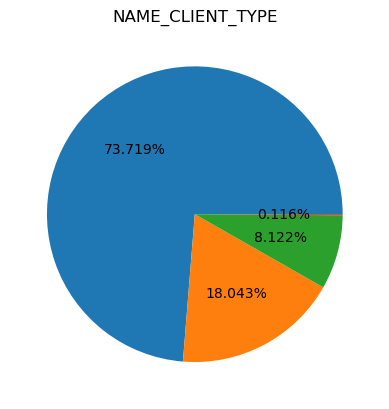

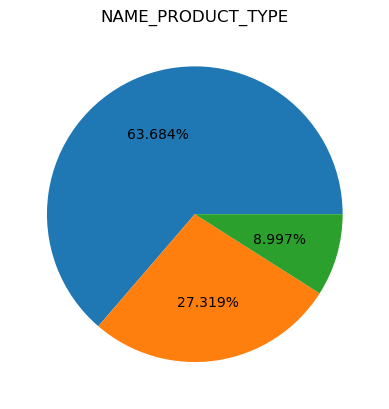

In [127]:
list=['NAME_CONTRACT_TYPE','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','NAME_CLIENT_TYPE','NAME_PRODUCT_TYPE']
for i in list:
    plt.pie(prev[i].value_counts(normalize=True),autopct='%.3f%%')
    plt.title(i)
    plt.show()

In [94]:
#univariate analysis

In [95]:
appl['AMT_CREDIT'].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [96]:
appl['AMT_CREDIT'].min()

45000.0

In [97]:
appl['AMT_CREDIT'].max()

4050000.0

In [98]:
bins1=[0,1000000,2000000,3000000,4000000,5000000]
val1=['0-1000000','1000000-2000000','2000000-3000000','3000000-4000000','4000000-5000000']
appl['credit_range']=pd.cut(appl['AMT_CREDIT'],bins1,labels=val1)


In [99]:
appl['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [100]:
appl['AMT_INCOME_TOTAL'].min()

25650.0

In [101]:
appl['AMT_INCOME_TOTAL'].max()

117000000.0

In [102]:
bins2=[0,100000,500000,1000000,20000000,40000000,60000000,80000000,100000000,120000000]
val2=['0-100000','100000-500000','500000-1000000','1000000-20000000','20000000-40000000','40000000-60000000','60000000-80000000','80000000-100000000','100000000-120000000']
appl['income_range']=pd.cut(appl['AMT_INCOME_TOTAL'],bins2,labels=val2)

In [103]:
appl['AMT_ANNUITY'].min()

1615.5

In [104]:
appl['AMT_ANNUITY'].max()

258025.5

In [105]:
bins4=[0,100000,200000,300000]
val4=['0-100000','100000-200000','200000-300000']
appl['annuity_range']=pd.cut(appl['AMT_INCOME_TOTAL'],bins2,labels=val2)

In [106]:
appl['DAYS_BIRTH'].min()

-25229

In [107]:
appl['DAYS_BIRTH']=abs(appl['DAYS_BIRTH'])

In [108]:
appl['DAYS_BIRTH'].min()

7489

In [109]:
appl['DAYS_BIRTH'].max()

25229

In [110]:
bins3=[0,7300,10950,14600,18250,21900,25500]
val3 = ['0-20','20-30','30-40','40-50','50-60','60-70']
appl['age_range']=pd.cut(appl['DAYS_BIRTH'], bins3, labels=val3)

In [111]:
appl.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,credit_range,income_range,annuity_range,age_range
307506,456251,0,Cash loans,M,N,N,157500.0,254700.0,27558.0,225000.0,...,0.006402,0.007,0.034362,0.267395,0.0,1.0,0-1000000,100000-500000,100000-500000,20-30
307507,456252,0,Cash loans,F,N,Y,72000.0,269550.0,12001.5,225000.0,...,0.006402,0.007,0.034362,0.267395,0.0,1.0,0-1000000,0-100000,0-100000,50-60
307508,456253,0,Cash loans,F,N,Y,153000.0,677664.0,29979.0,585000.0,...,1.000000,0.000,0.000000,1.000000,0.0,1.0,0-1000000,100000-500000,100000-500000,40-50
307509,456254,1,Cash loans,F,N,Y,171000.0,370107.0,20205.0,319500.0,...,0.000000,0.000,0.000000,0.000000,0.0,0.0,0-1000000,100000-500000,100000-500000,30-40
307510,456255,0,Cash loans,F,N,N,157500.0,675000.0,49117.5,675000.0,...,0.000000,0.000,0.000000,2.000000,0.0,1.0,0-1000000,100000-500000,100000-500000,40-50


C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


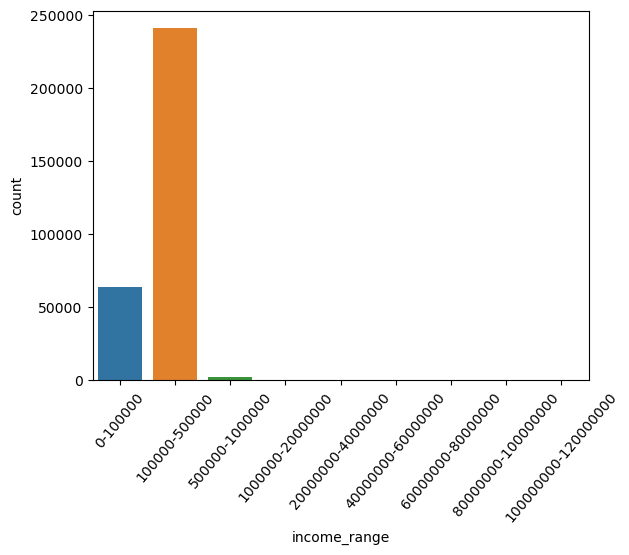

In [112]:
sns.countplot(appl['income_range'])
plt.xticks(rotation=50)
plt.show()

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


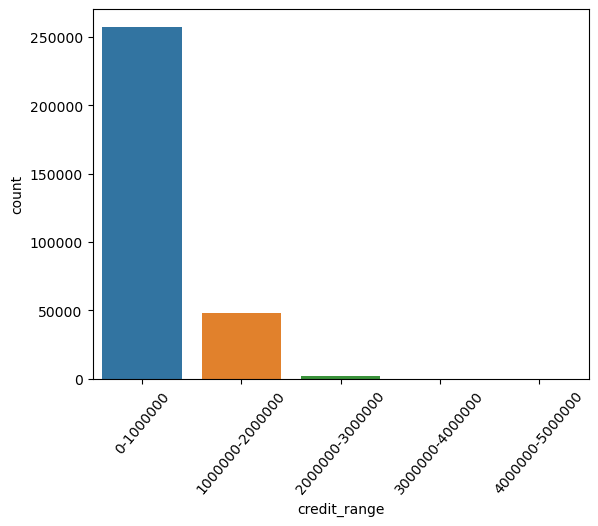

In [113]:
sns.countplot(appl['credit_range'])
plt.xticks(rotation=50)
plt.show()

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


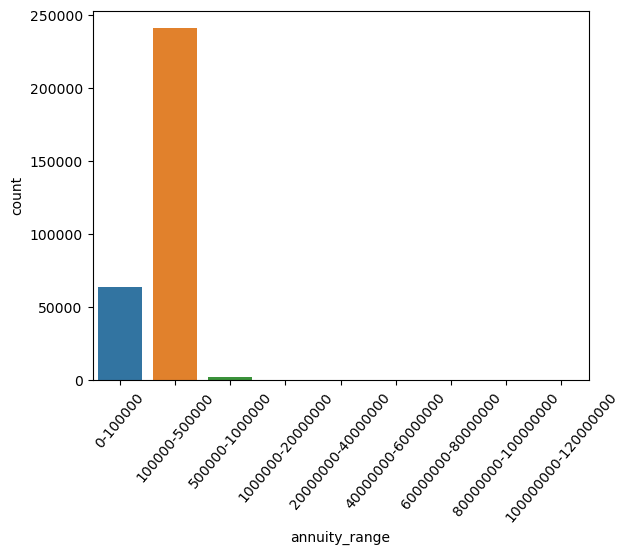

In [114]:
sns.countplot(appl['annuity_range'])
plt.xticks(rotation=50)
plt.show()

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


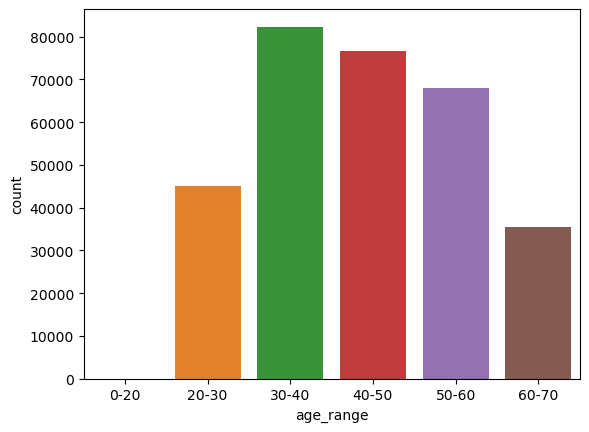

In [115]:
sns.countplot(appl['age_range'])
#plt.xticks(rotation=50)
plt.show()

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


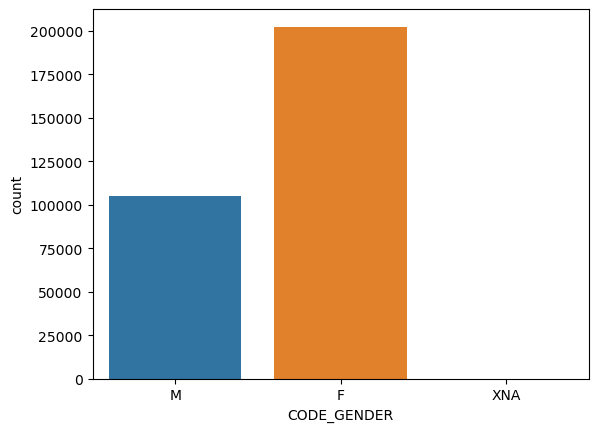

In [116]:
sns.countplot(appl['CODE_GENDER'])
plt.show()

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


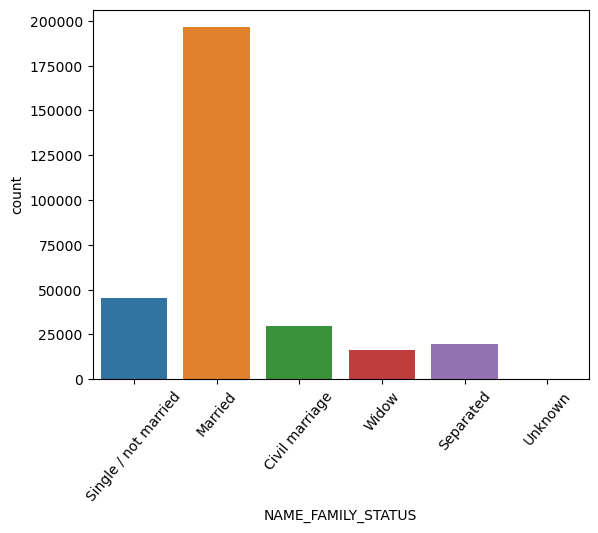

In [117]:
sns.countplot(appl['NAME_FAMILY_STATUS'])
plt.xticks(rotation=50)
plt.show()

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


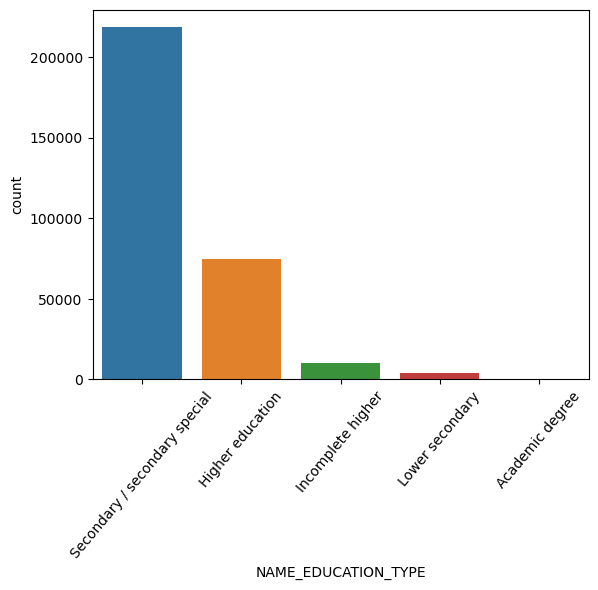

In [118]:
sns.countplot(appl['NAME_EDUCATION_TYPE'])
plt.xticks(rotation=50)
plt.show()

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


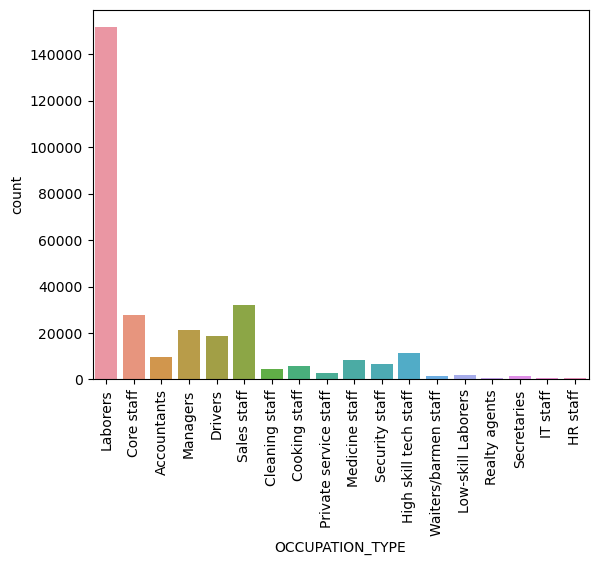

In [119]:
sns.countplot(appl['OCCUPATION_TYPE'])
plt.xticks(rotation=90)
plt.show()

In [120]:
prev['AMT_ANNUITY'].min()

0.0

In [121]:
prev['AMT_ANNUITY'].max()

418058.145

In [122]:
bins=[0,50000,100000,200000,300000,400000,500000]
val=['0-50000','50000-100000','100000-200000','200000-300000','300000-400000','400000-500000']


In [123]:
prev['annuity_range']=pd.cut(prev['AMT_ANNUITY'],bins,labels=val)

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


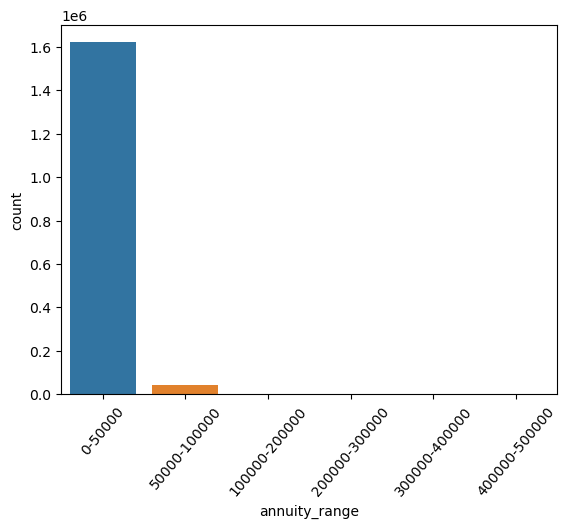

In [124]:
sns.countplot(prev['annuity_range'])
plt.xticks(rotation=50)
plt.show()

In [125]:
prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,...,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,annuity_range
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,Y,1,XAP,...,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,0-50000
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,Y,1,XNA,...,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,0-50000
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,Y,1,XNA,...,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,0-50000
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,Y,1,XNA,...,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,0-50000
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Y,1,Repairs,...,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,0-50000


In [126]:
prev['AMT_CREDIT'].min()

0.0

In [127]:
prev['AMT_CREDIT'].max()

6905160.0

In [128]:
bins=[0,100000,1000000,2000000,3000000,4000000,5000000,6000000,7000000]
val=['0-100000','100000-1000000','1000000-2000000','2000000-3000000','3000000-4000000','4000000-5000000','5000000-6000000','6000000-7000000']
prev['credit_range']=pd.cut(prev['AMT_CREDIT'],bins,labels=val)

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


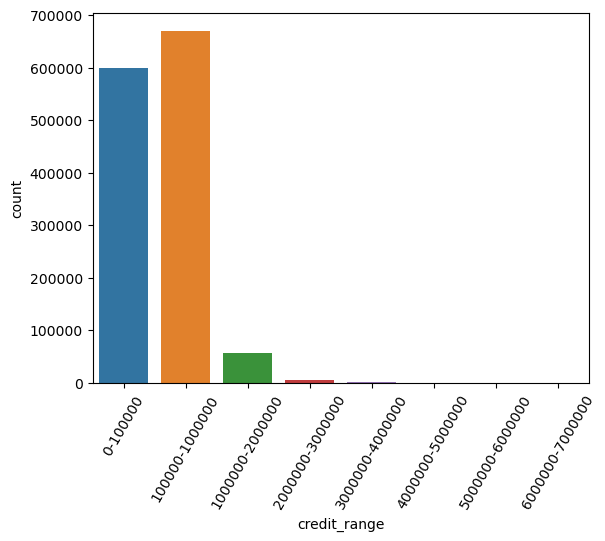

In [129]:
sns.countplot(prev['credit_range'])
plt.xticks(rotation=60)
plt.show()

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


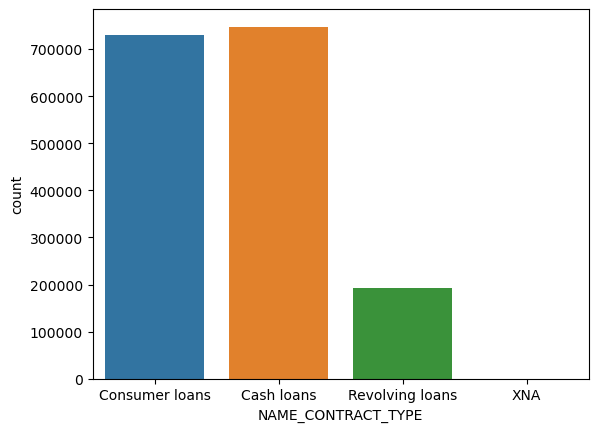

In [130]:
sns.countplot(prev['NAME_CONTRACT_TYPE'])
plt.show()

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


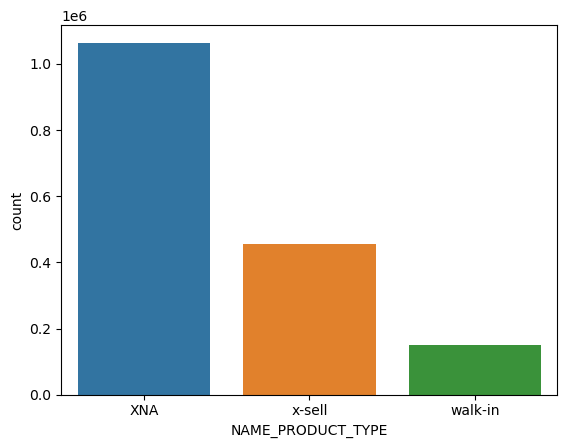

In [131]:
sns.countplot(prev['NAME_PRODUCT_TYPE'])
plt.show()

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


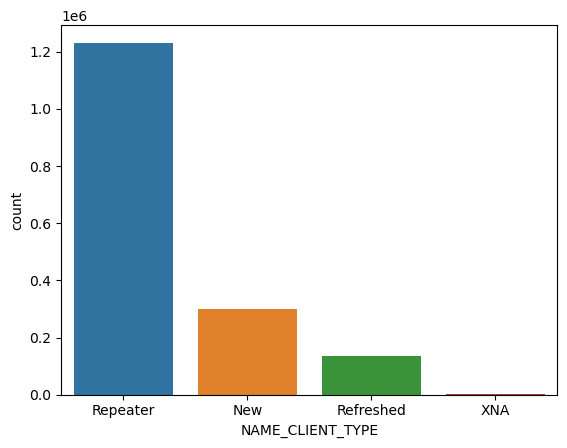

In [132]:
sns.countplot(prev['NAME_CLIENT_TYPE'])
plt.show()

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


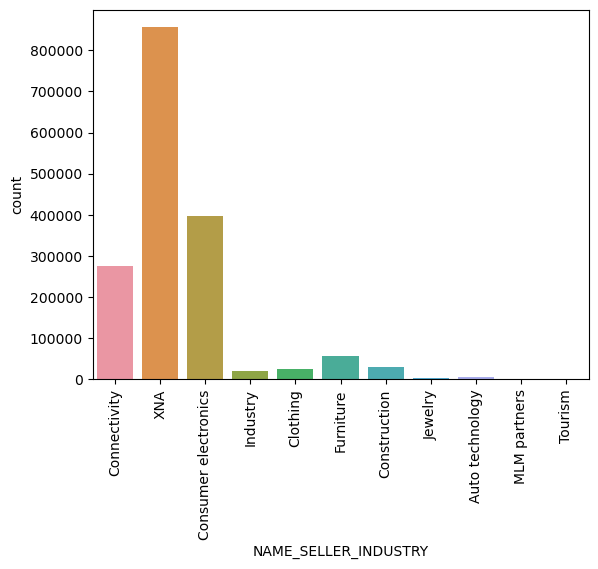

In [133]:
sns.countplot(prev['NAME_SELLER_INDUSTRY'])
plt.xticks(rotation=90)
plt.show()

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


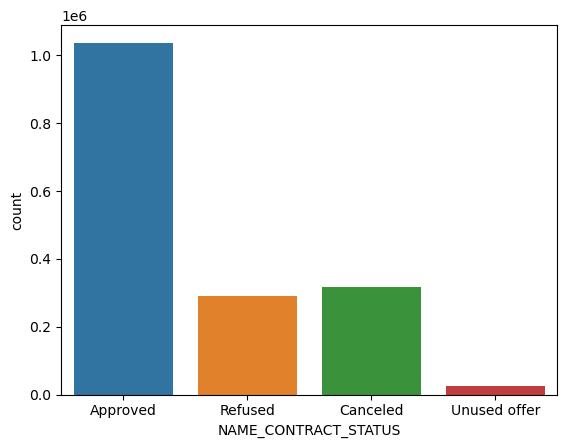

In [134]:
sns.countplot(prev['NAME_CONTRACT_STATUS'])
plt.show()

In [135]:
#Segmented univariate

In [136]:
target_1=appl[appl['TARGET']==1]
target_0=appl[appl['TARGET']==0]

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


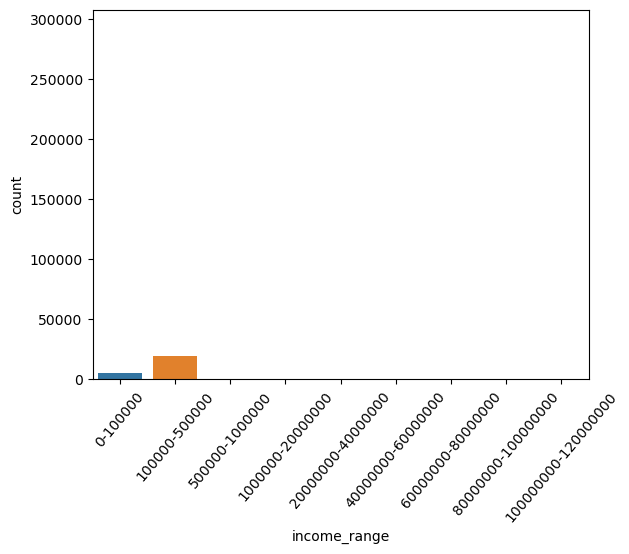

In [137]:
sns.countplot(target_1['income_range'])
plt.ylim(0,307511)
plt.xticks(rotation=50)
plt.show()

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


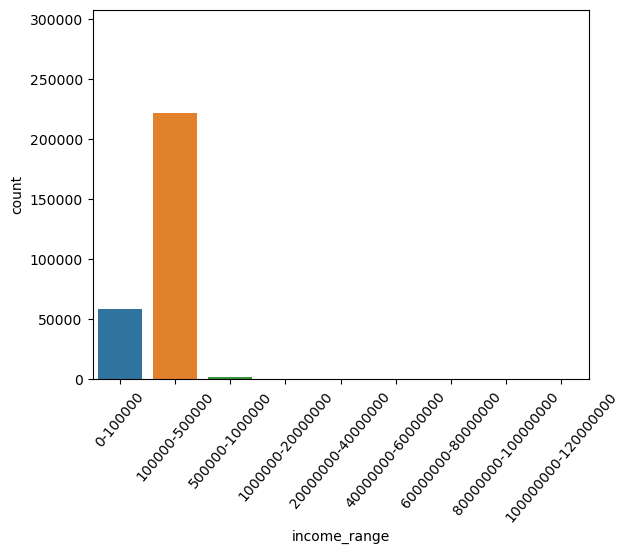

In [138]:
sns.countplot(target_0['income_range'])
plt.ylim(0,307511)
plt.xticks(rotation=50)
plt.show()

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


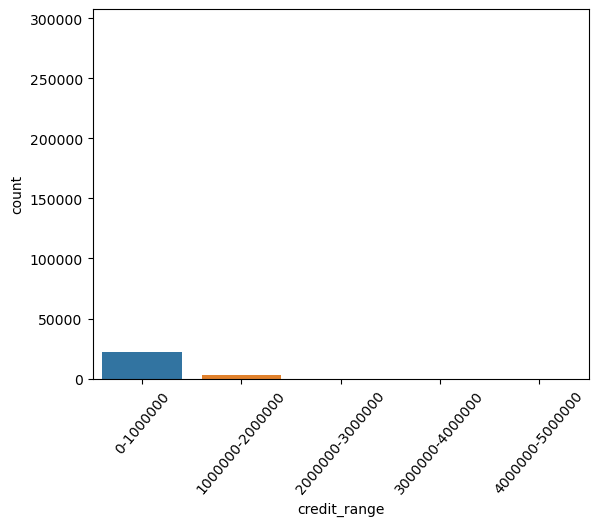

In [139]:
sns.countplot(target_1['credit_range'])
plt.ylim(0,307511)
plt.xticks(rotation=50)
plt.show()

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


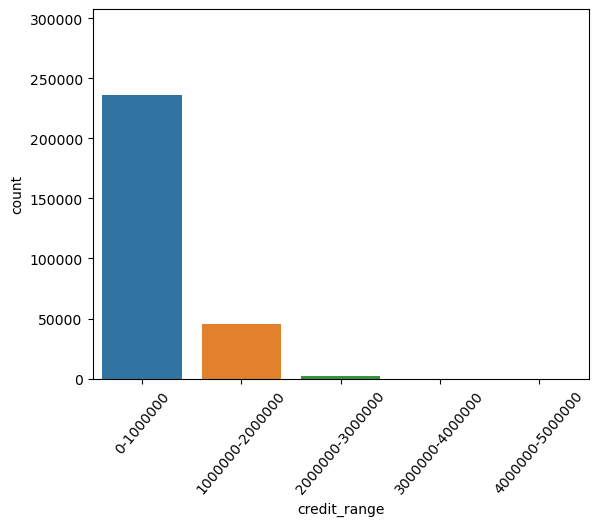

In [140]:
sns.countplot(target_0['credit_range'])
plt.ylim(0,307511)
plt.xticks(rotation=50)
plt.show()

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


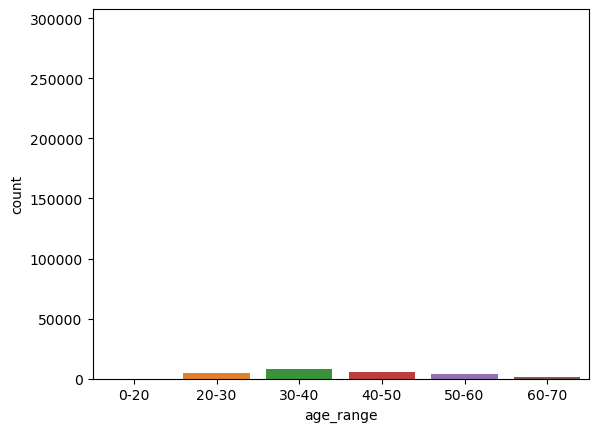

In [141]:
sns.countplot(target_1['age_range'])
plt.ylim(0,307511)
#plt.xticks(rotation=50)
plt.show()

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


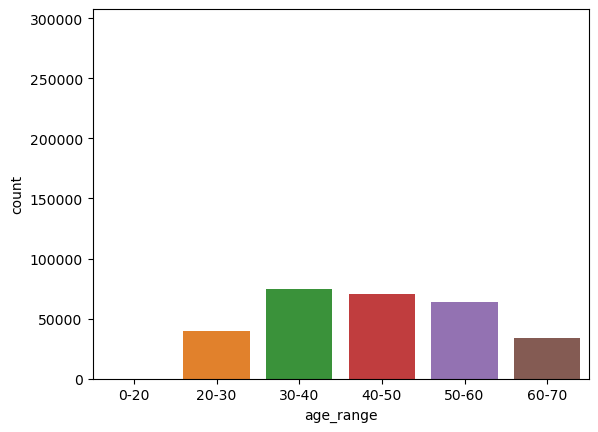

In [142]:
sns.countplot(target_0['age_range'])
plt.ylim(0,307511)
#plt.xticks(rotation=50)
plt.show()

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


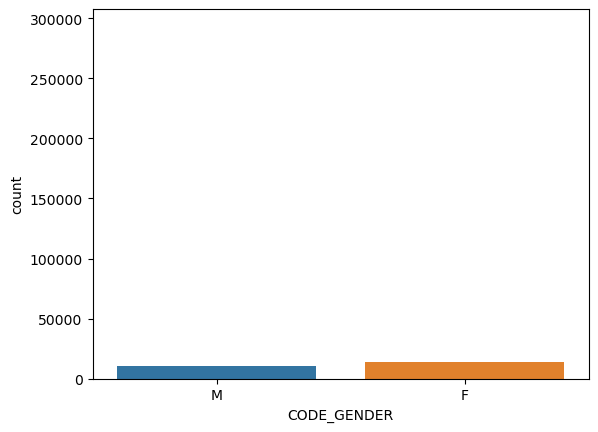

In [143]:
sns.countplot(target_1['CODE_GENDER'])
plt.ylim(0,307511)
plt.show()

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


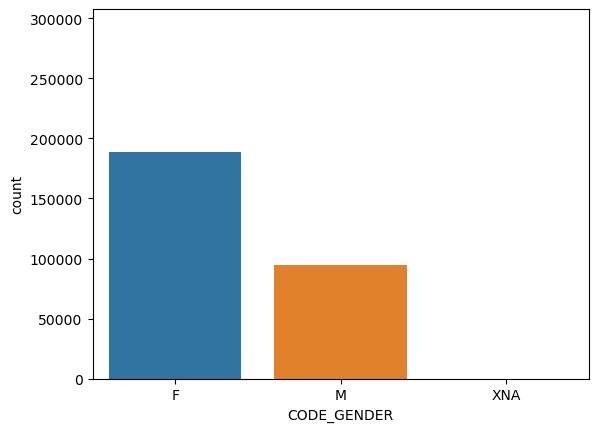

In [144]:
sns.countplot(target_0['CODE_GENDER'])
plt.ylim(0,307511)
plt.show()

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


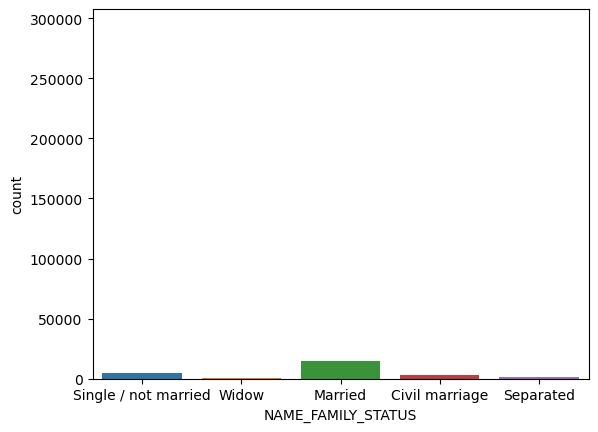

In [145]:
sns.countplot(target_1['NAME_FAMILY_STATUS'])
plt.ylim(0,307511)
plt.show()

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


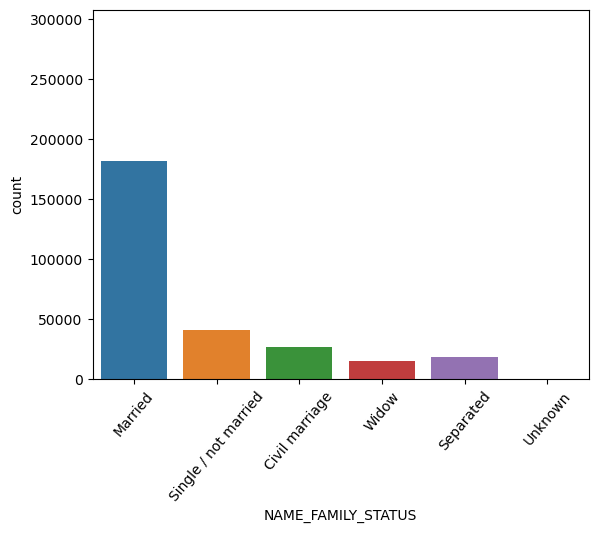

In [146]:
sns.countplot(target_0['NAME_FAMILY_STATUS'])
plt.xticks(rotation=50)
plt.ylim(0,307511)
plt.show()

In [147]:
#multivariate analysis

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


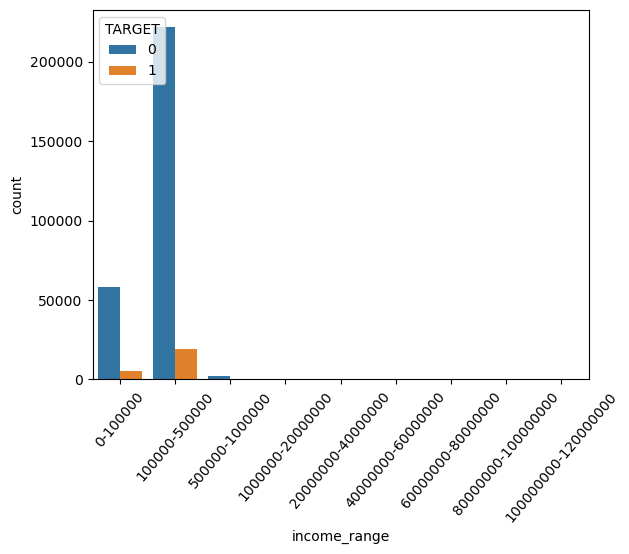

In [148]:
sns.countplot('income_range', hue = 'TARGET', data = appl)
plt.xticks(rotation = 50)
plt.show()

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


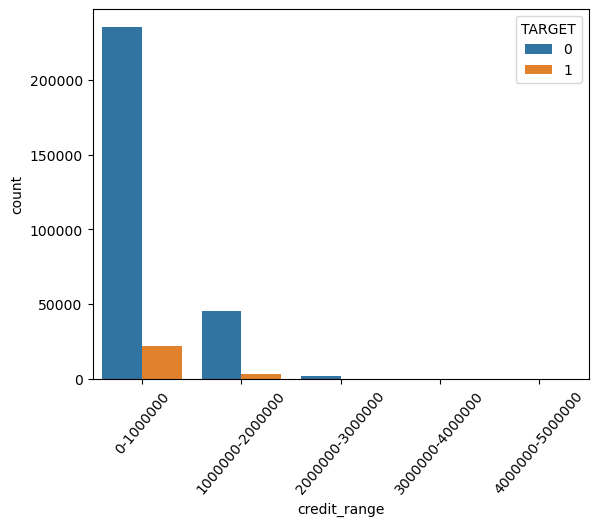

In [149]:
sns.countplot('credit_range', hue = 'TARGET', data = appl)
plt.xticks(rotation = 50)
plt.show()

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


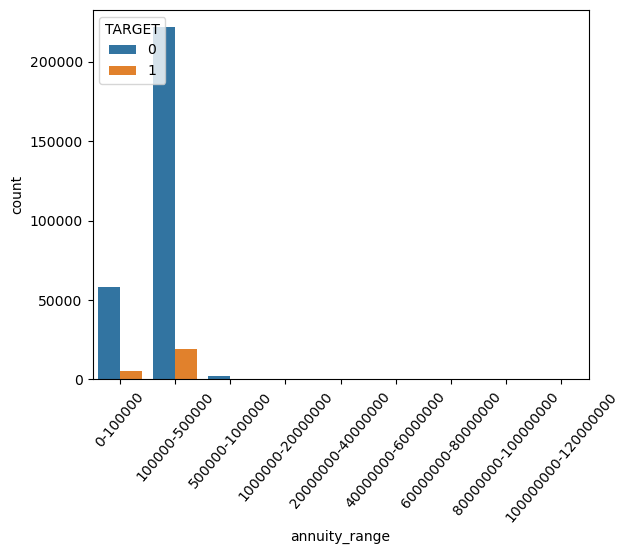

In [150]:
sns.countplot('annuity_range', hue = 'TARGET', data = appl)
plt.xticks(rotation = 50)
plt.show()

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


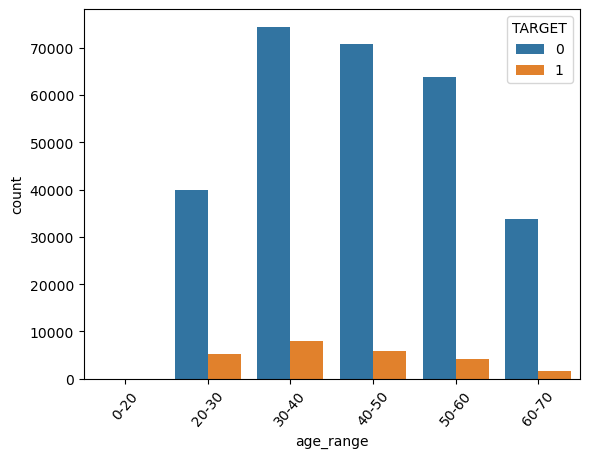

In [151]:
sns.countplot('age_range', hue = 'TARGET', data = appl)
plt.xticks(rotation = 50)
plt.show()

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


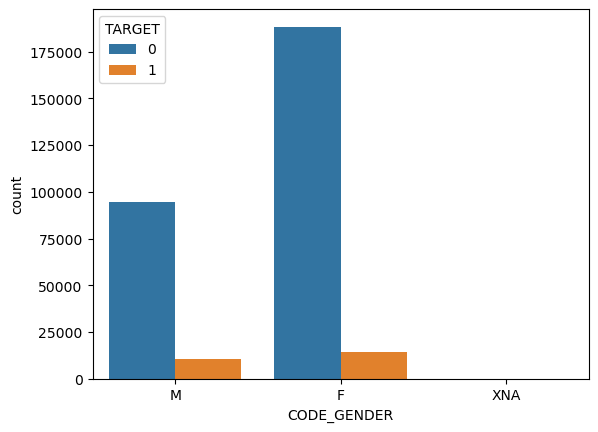

In [152]:
sns.countplot('CODE_GENDER', hue = 'TARGET', data = appl)
#plt.xticks(rotation = 50)
plt.show()

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


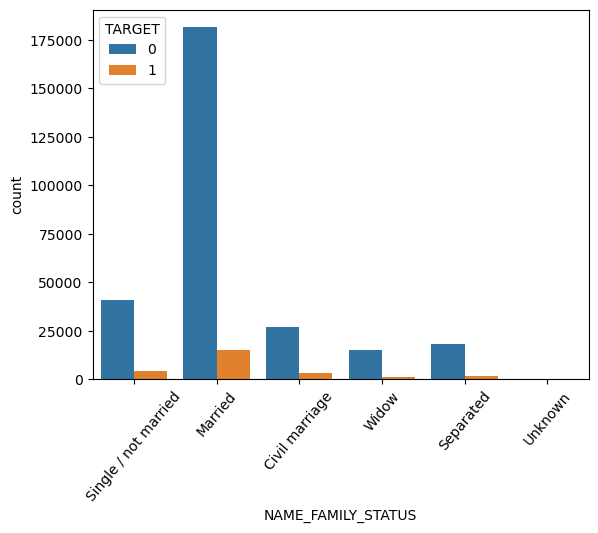

In [153]:
sns.countplot('NAME_FAMILY_STATUS', hue = 'TARGET', data = appl)
plt.xticks(rotation = 50)
plt.show()

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


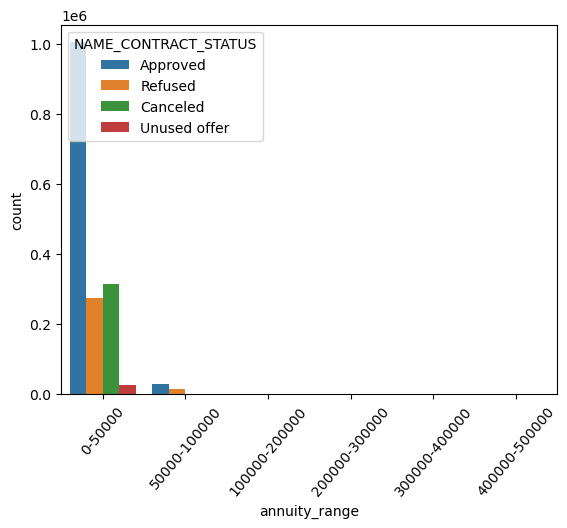

In [154]:
sns.countplot('annuity_range', hue = 'NAME_CONTRACT_STATUS', data = prev)
plt.xticks(rotation = 50)
plt.show()

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


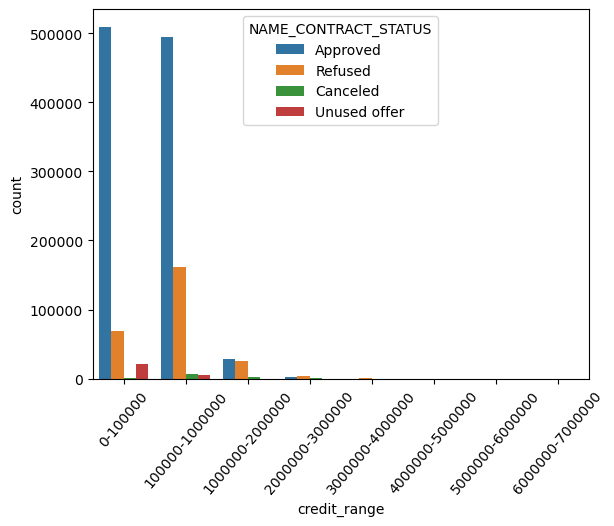

In [155]:
sns.countplot('credit_range', hue = 'NAME_CONTRACT_STATUS', data = prev)
plt.xticks(rotation = 50)
plt.show()

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


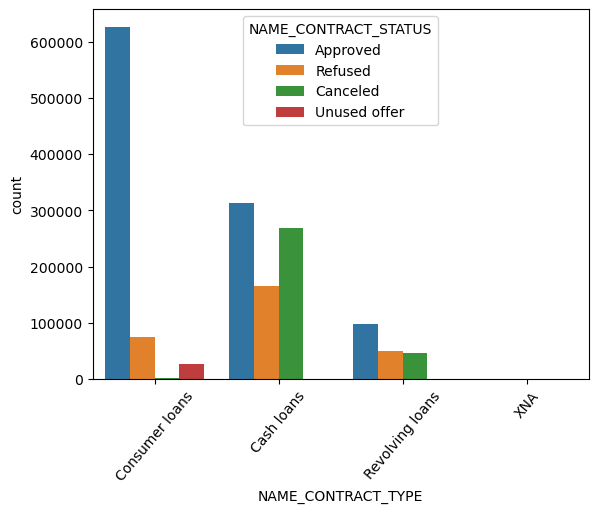

In [156]:
sns.countplot('NAME_CONTRACT_TYPE', hue = 'NAME_CONTRACT_STATUS', data = prev)
plt.xticks(rotation = 50)
plt.show()

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


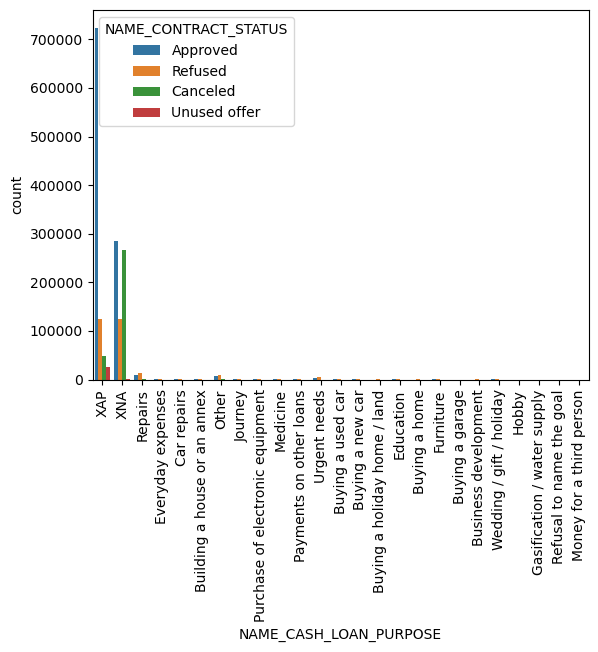

In [157]:
sns.countplot('NAME_CASH_LOAN_PURPOSE', hue = 'NAME_CONTRACT_STATUS', data = prev)
plt.xticks(rotation = 90)
plt.show()

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


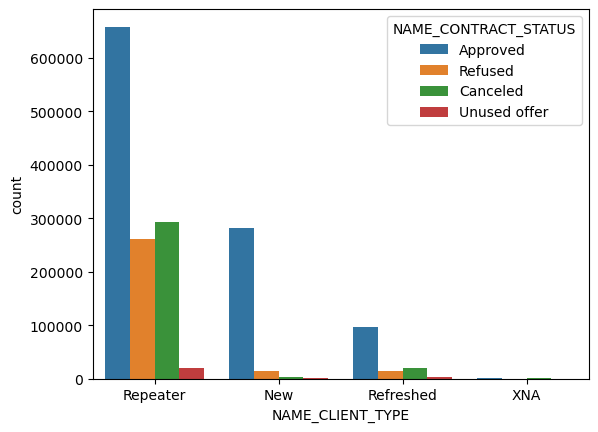

In [158]:
sns.countplot('NAME_CLIENT_TYPE', hue = 'NAME_CONTRACT_STATUS', data = prev)
#plt.xticks(rotation = 90)
plt.show()

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


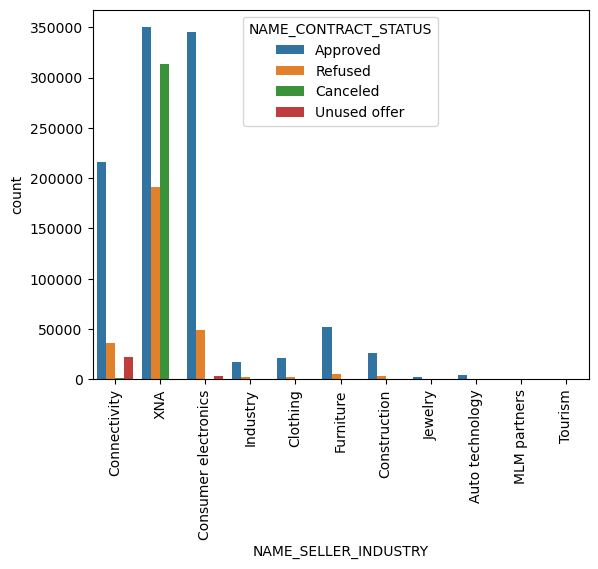

In [159]:
sns.countplot('NAME_SELLER_INDUSTRY', hue = 'NAME_CONTRACT_STATUS', data = prev)
plt.xticks(rotation = 90)
plt.show()

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


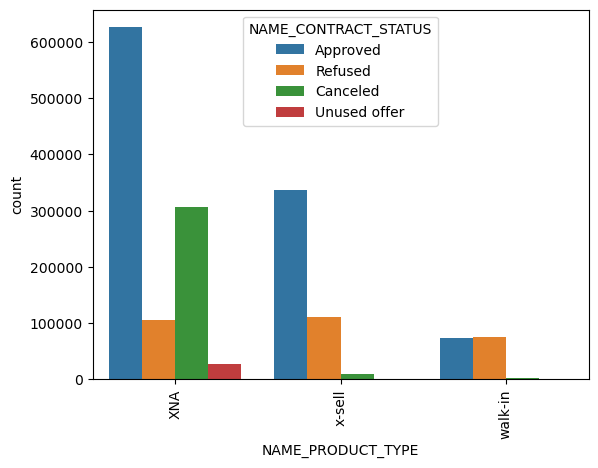

In [160]:
sns.countplot('NAME_PRODUCT_TYPE', hue = 'NAME_CONTRACT_STATUS', data = prev)
plt.xticks(rotation = 90)
plt.show()

In [161]:
#correlation

In [162]:
cor_0=target_0.corr().round(2).abs()

In [163]:
cor_0

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.0,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMT_INCOME_TOTAL,0.0,NaN,1.00,0.34,0.42,0.35,0.06,0.14,0.06,0.02,...,0.03,0.03,0.03,0.03,0.00,0.01,0.01,0.05,0.02,0.03
AMT_CREDIT,0.0,NaN,0.34,1.00,0.77,0.99,0.05,0.07,0.01,0.00,...,0.00,0.02,0.00,0.02,0.00,0.00,0.00,0.05,0.02,0.04
AMT_ANNUITY,0.0,NaN,0.42,0.77,1.00,0.78,0.01,0.11,0.04,0.01,...,0.01,0.02,0.01,0.02,0.00,0.00,0.01,0.04,0.01,0.01
AMT_GOODS_PRICE,0.0,NaN,0.35,0.99,0.78,1.00,0.04,0.07,0.02,0.00,...,0.00,0.02,0.00,0.02,0.00,0.00,0.00,0.05,0.02,0.04
DAYS_BIRTH,0.0,NaN,0.06,0.05,0.01,0.04,1.00,0.62,0.33,0.27,...,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.02,0.07
DAYS_EMPLOYED,0.0,NaN,0.14,0.07,0.11,0.07,0.62,1.00,0.21,0.27,...,0.01,0.02,0.01,0.02,0.00,0.00,0.00,0.03,0.01,0.05
DAYS_REGISTRATION,0.0,NaN,0.06,0.01,0.04,0.02,0.33,0.21,1.00,0.10,...,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.02
DAYS_ID_PUBLISH,0.0,NaN,0.02,0.00,0.01,0.00,0.27,0.27,0.10,1.00,...,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.02,0.05


In [164]:
cor_0=cor_0.where(np.triu(np.ones(cor_0.shape), k=1).astype(np.bool))

C:\Users\navee\AppData\Local\Temp\ipykernel_10492\1453467958.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cor_0=cor_0.where(np.triu(np.ones(cor_0.shape), k=1).astype(np.bool))


In [165]:
cor_0

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,NaN,NaN,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMT_INCOME_TOTAL,NaN,NaN,NaN,0.34,0.42,0.35,0.06,0.14,0.06,0.02,...,0.03,0.03,0.03,0.03,0.0,0.01,0.01,0.05,0.02,0.03
AMT_CREDIT,NaN,NaN,NaN,NaN,0.77,0.99,0.05,0.07,0.01,0.00,...,0.00,0.02,0.00,0.02,0.0,0.00,0.00,0.05,0.02,0.04
AMT_ANNUITY,NaN,NaN,NaN,NaN,NaN,0.78,0.01,0.11,0.04,0.01,...,0.01,0.02,0.01,0.02,0.0,0.00,0.01,0.04,0.01,0.01
AMT_GOODS_PRICE,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0.07,0.02,0.00,...,0.00,0.02,0.00,0.02,0.0,0.00,0.00,0.05,0.02,0.04
DAYS_BIRTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.62,0.33,0.27,...,0.01,0.00,0.01,0.00,0.0,0.00,0.00,0.00,0.02,0.07
DAYS_EMPLOYED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.21,0.27,...,0.01,0.02,0.01,0.02,0.0,0.00,0.00,0.03,0.01,0.05
DAYS_REGISTRATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,...,0.01,0.00,0.01,0.00,0.0,0.00,0.00,0.01,0.00,0.02
DAYS_ID_PUBLISH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.01,0.00,0.01,0.00,0.0,0.00,0.00,0.01,0.02,0.05


In [166]:
df_0=cor_0.unstack().reset_index()
df_0.head()

,level_0,level_1,0
0,SK_ID_CURR,SK_ID_CURR,NaN
1,SK_ID_CURR,TARGET,NaN
2,SK_ID_CURR,AMT_INCOME_TOTAL,NaN
3,SK_ID_CURR,AMT_CREDIT,NaN
4,SK_ID_CURR,AMT_ANNUITY,NaN


In [167]:
df_0.columns=['COL1','COL2','corr']
df_0.dropna(subset = ['corr'], inplace = True)

In [168]:
sort_df_0=df_0.sort_values(by='corr',ascending=False)
sort_df_0.head(10)

,COL1,COL2,corr
530,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
138,AMT_GOODS_PRICE,AMT_CREDIT,0.99
335,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.86
558,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.86
419,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.83
139,AMT_GOODS_PRICE,AMT_ANNUITY,0.78
111,AMT_ANNUITY,AMT_CREDIT,0.77
195,DAYS_EMPLOYED,DAYS_BIRTH,0.62
307,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,0.45
391,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,0.44


In [169]:
cor_1=target_1.corr().round(2).abs()

In [170]:
cor_1=cor_1.where(np.triu(np.ones(cor_1.shape),k=1).astype(np.bool))

C:\Users\navee\AppData\Local\Temp\ipykernel_10492\387072759.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cor_1=cor_1.where(np.triu(np.ones(cor_1.shape),k=1).astype(np.bool))


In [171]:
cor_1=cor_1.unstack().reset_index()

In [172]:
cor_1.columns=['COL1','COL2','corr']
cor_1.dropna(subset = ['corr'], inplace = True)

In [173]:
cor_1=cor_1.sort_values(by='corr',ascending=False)
cor_1.head(10)

,COL1,COL2,corr
530,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
138,AMT_GOODS_PRICE,AMT_CREDIT,0.98
558,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.87
335,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.85
419,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.78
111,AMT_ANNUITY,AMT_CREDIT,0.75
139,AMT_GOODS_PRICE,AMT_ANNUITY,0.75
195,DAYS_EMPLOYED,DAYS_BIRTH,0.58
307,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,0.50
391,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,0.47


In [174]:
refusal=prev[prev['NAME_CONTRACT_STATUS']=='Refused']
approved=prev[prev['NAME_CONTRACT_STATUS']=='Approved']

In [175]:
cor_refusal=refusal.corr().round(2).abs()
cor_refusal=cor_refusal.where(np.triu(np.ones(cor_refusal.shape), k=1).astype(np.bool))
cor_refusal=cor_refusal.unstack().reset_index()
cor_refusal.columns=['column1','column2','corr']
cor_refusal.dropna(subset = ['corr'], inplace = True)
cor_refusal=cor_refusal.sort_values(by='corr',ascending=False)
cor_refusal.head(10)

C:\Users\navee\AppData\Local\Temp\ipykernel_10492\1912301376.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cor_refusal=cor_refusal.where(np.triu(np.ones(cor_refusal.shape), k=1).astype(np.bool))


,column1,column2,corr
53,AMT_GOODS_PRICE,AMT_APPLICATION,1.00
43,AMT_CREDIT,AMT_APPLICATION,0.98
54,AMT_GOODS_PRICE,AMT_CREDIT,0.98
52,AMT_GOODS_PRICE,AMT_ANNUITY,0.83
32,AMT_APPLICATION,AMT_ANNUITY,0.82
42,AMT_CREDIT,AMT_ANNUITY,0.82
93,CNT_PAYMENT,AMT_APPLICATION,0.69
94,CNT_PAYMENT,AMT_CREDIT,0.69
95,CNT_PAYMENT,AMT_GOODS_PRICE,0.68
92,CNT_PAYMENT,AMT_ANNUITY,0.45


In [176]:
cor_approved=approved.corr().round(2).abs()
cor_approved=cor_approved.where(np.triu(np.ones(cor_approved.shape), k=1).astype(np.bool))
cor_approved=cor_approved.unstack().reset_index()
cor_approved.columns=['column1','column2','corr']
cor_approved.dropna(subset = ['corr'], inplace = True)
cor_approved=cor_approved.sort_values(by='corr',ascending=False)
cor_approved.head(10)

C:\Users\navee\AppData\Local\Temp\ipykernel_10492\3157347255.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cor_approved=cor_approved.where(np.triu(np.ones(cor_approved.shape), k=1).astype(np.bool))


,column1,column2,corr
53,AMT_GOODS_PRICE,AMT_APPLICATION,1.00
54,AMT_GOODS_PRICE,AMT_CREDIT,0.98
43,AMT_CREDIT,AMT_APPLICATION,0.96
42,AMT_CREDIT,AMT_ANNUITY,0.83
52,AMT_GOODS_PRICE,AMT_ANNUITY,0.82
32,AMT_APPLICATION,AMT_ANNUITY,0.81
93,CNT_PAYMENT,AMT_APPLICATION,0.65
95,CNT_PAYMENT,AMT_GOODS_PRICE,0.63
94,CNT_PAYMENT,AMT_CREDIT,0.63
92,CNT_PAYMENT,AMT_ANNUITY,0.34


In [177]:
result= pd.merge(appl,prev,how='inner',on='SK_ID_CURR')
result.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,...,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,annuity_range_y,credit_range_y
0,100002,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,351000.0,...,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,0-50000,100000-1000000
1,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,...,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,50000-100000,1000000-2000000
2,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,...,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,50000-100000,100000-1000000
3,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,...,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,0-50000,0-100000
4,100004,0,Revolving loans,M,Y,Y,67500.0,135000.0,6750.0,135000.0,...,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest,0-50000,0-100000


In [178]:
result.shape

(1413701, 67)

In [179]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 67 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  int64   
 1   TARGET                       1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1413701 non-null  object  
 3   CODE_GENDER                  1413701 non-null  object  
 4   FLAG_OWN_CAR                 1413701 non-null  object  
 5   FLAG_OWN_REALTY              1413701 non-null  object  
 6   AMT_INCOME_TOTAL             1413701 non-null  float64 
 7   AMT_CREDIT_x                 1413701 non-null  float64 
 8   AMT_ANNUITY_x                1413701 non-null  float64 
 9   AMT_GOODS_PRICE_x            1413701 non-null  float64 
 10  NAME_TYPE_SUITE              1413701 non-null  object  
 11  NAME_INCOME_TYPE             1413701 non-null  object  
 12  NAME_EDUCATION_TYPE         

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


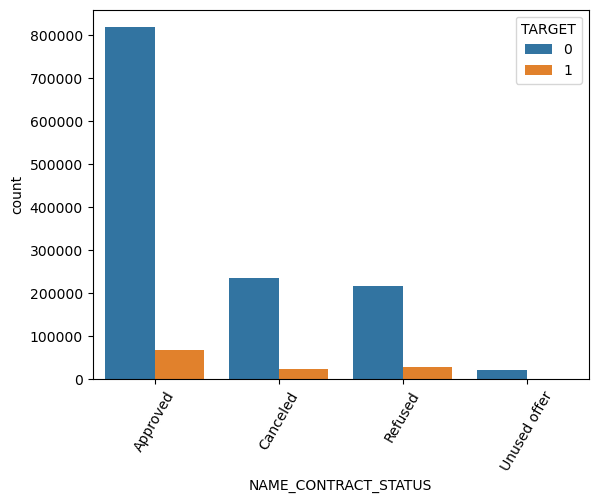

In [180]:
sns.countplot('NAME_CONTRACT_STATUS',hue='TARGET',data=result)
plt.xticks(rotation=60)
plt.show()

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


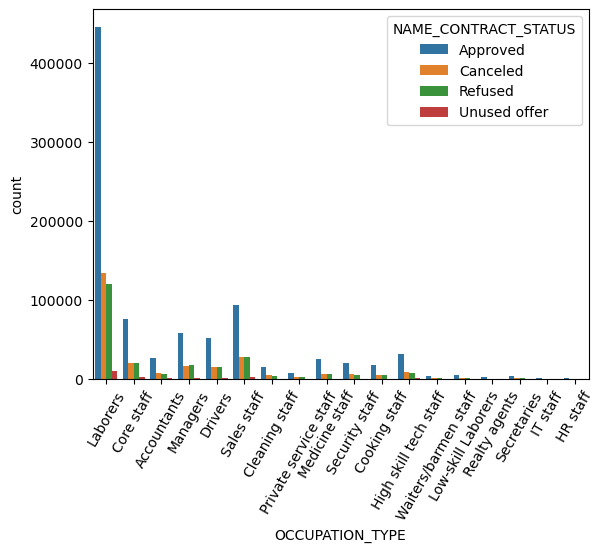

In [181]:
sns.countplot('OCCUPATION_TYPE',hue='NAME_CONTRACT_STATUS',data=result)
plt.xticks(rotation=60)
plt.show()

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


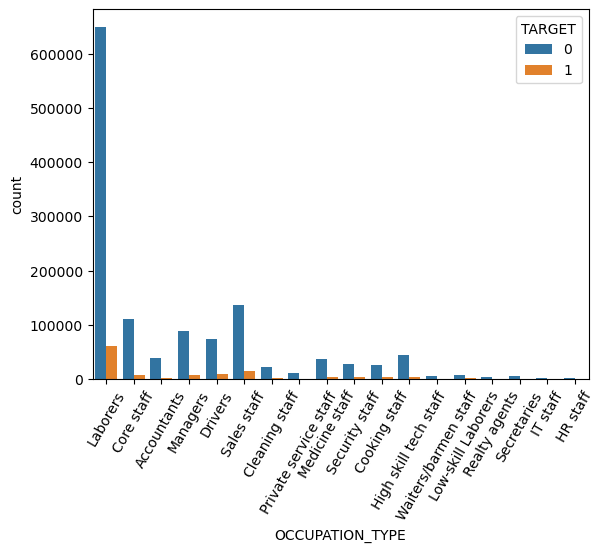

In [182]:
sns.countplot('OCCUPATION_TYPE',hue='TARGET',data=result)
plt.xticks(rotation=60)
plt.show()

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


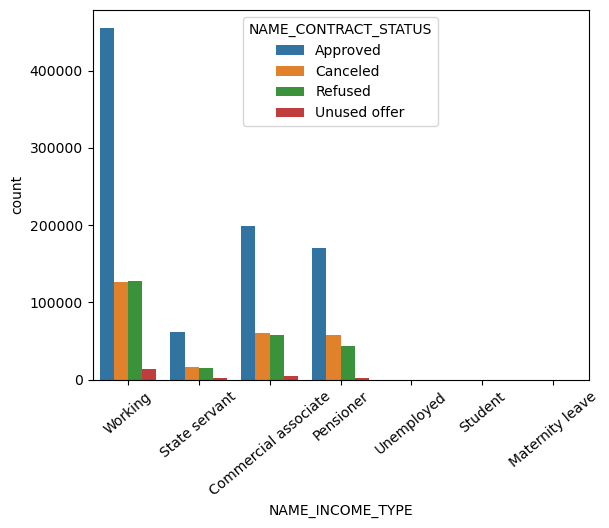

In [183]:
sns.countplot('NAME_INCOME_TYPE',hue='NAME_CONTRACT_STATUS',data=result)
plt.xticks(rotation=40)
plt.show()

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


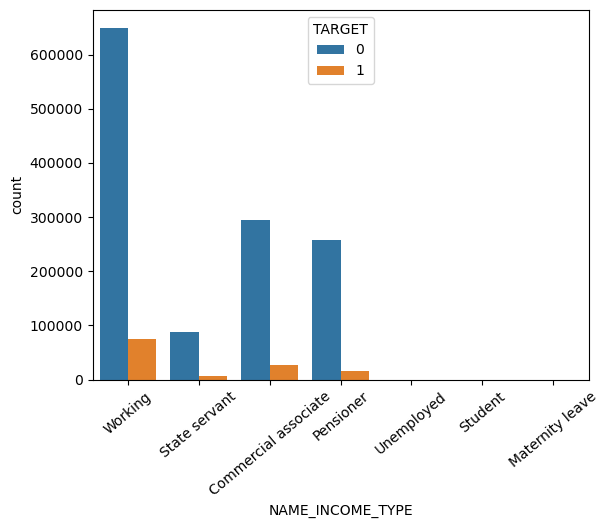

In [184]:
sns.countplot('NAME_INCOME_TYPE',hue='TARGET',data=result)
plt.xticks(rotation=40)
plt.show()

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


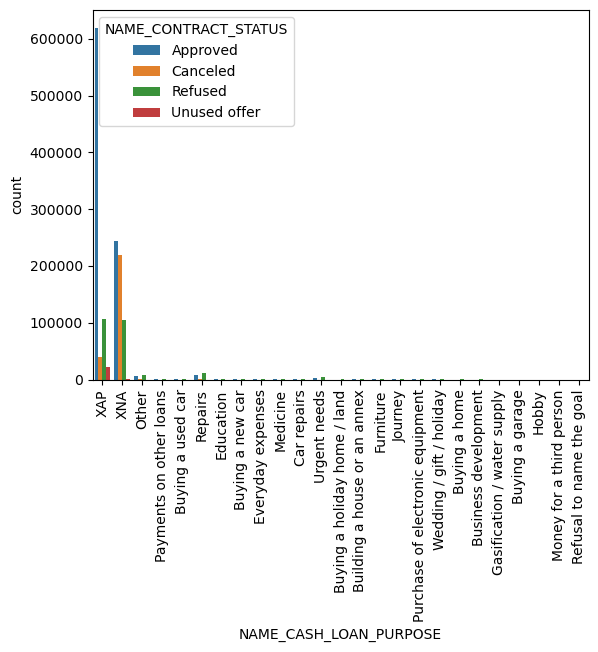

In [185]:
sns.countplot('NAME_CASH_LOAN_PURPOSE',hue='NAME_CONTRACT_STATUS',data=result)
plt.xticks(rotation=90)
plt.show()

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


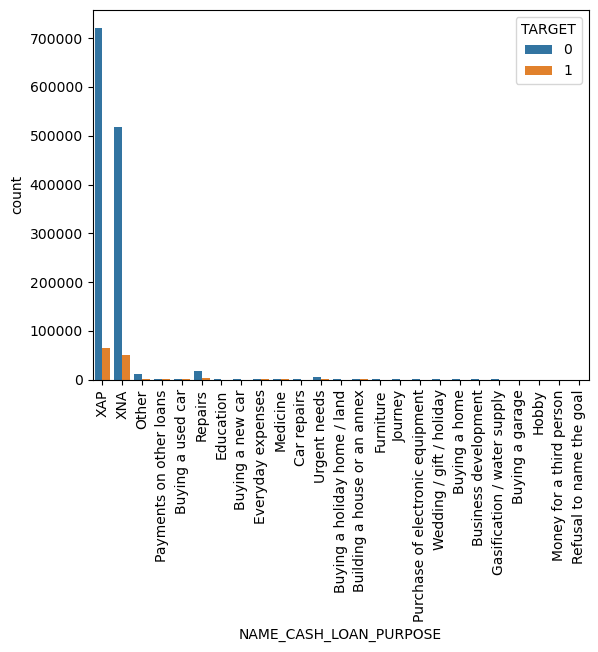

In [186]:
sns.countplot('NAME_CASH_LOAN_PURPOSE',hue='TARGET',data=result)
plt.xticks(rotation=90)
plt.show()